In [1]:
global_update_live = False
email_both = False

In [2]:
import pandas as pd
import random
from pydataquery import DataQuery
from matplotlib.colors import LinearSegmentedColormap
from xbbg import blp
import numpy as np
import pytz
import time
from datetime import datetime, timedelta
import statsmodels.api as sm
from ipywidgets import interact, Dropdown, HBox, VBox, Button, Output, Text, widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import re
import scipy.stats as stats
from adjustText import adjust_text
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sympy as sp
import itertools
import warnings
import openpyxl
import subprocess
import dataframe_image as dfi
import time
import pyautogui
import pygetwindow as gw
import pyodbc
import ast
import json
warnings.filterwarnings("ignore")

In [33]:
# dft = pd.read_excel("DQ_Data_v75.xlsx")
# dft.set_index(dft.columns[0],inplace=True)
# dft.index.name = None
# dft.index = pd.to_datetime(dft.index, format='%Y-%m-%d').date
# df_back = dft.copy()
dft[[col for col in dft.columns if col.startswith("BRASKM")]]

,BRASKM 7.125% due 41 PECS Ask,BRASKM 7.125% due 41 PECS Bid,BRASKM 7.125% due 41 Basis
2020-09-11,519.0,528.0,-227.145522
2020-09-14,514.0,522.0,-222.112495
2020-09-15,513.0,522.0,-221.260316
2020-09-16,525.0,534.0,-233.451645
2020-09-17,531.0,540.0,-240.427903
...,...,...,...
2025-09-05,852.0,877.0,-474.112632
2025-09-08,896.0,922.0,-519.103722
2025-09-09,911.0,938.0,-534.703738
2025-09-10,917.0,951.0,-544.067163


In [3]:
dft = pd.read_excel("DQ_Data_v75.xlsx")
dft.set_index(dft.columns[0],inplace=True)
dft.index.name = None
dft.index = pd.to_datetime(dft.index, format='%Y-%m-%d').date
df_back = dft.copy()

start_date = df_back.index.max()

##################  Change here only

isin_list = ["US105756BX78", "US105756BZ27", "US105756CA66", "US105756CC23", "US105756CG37", "US105756CE88", "US105756CK49", "US105756CF53", "US105756CH10", "US105756BW95", "US105756BY51", "US105756CB40", "US105756CJ75", "US168863DX33", "US168863CF36", "US168863EB04", "US168863DP09", "US168863DN50", "US168863DT21", "US168863DV76", "US168863DZ80", "US168863DS48", "US168863DY16", "US168863CE60", "US168863DL94", "US168863DW59", "XS2327851874", "US168863EA21", "US168863DQ81", "US168863DU93", "US195325CX13", "US195325DL65", "US195325DP79", "US195325DR36", "US195325DS19", "US195325DZ51", "US195325EF88", "US195325EG61", "US195325EL56", "US195325BK01", "US195325BM66", "US195325EA91", "US195325BR53", "US195325CU73", "US195325DQ52", "US195325DT91", "US195325EM30", "US195325DX04", "US91086QBG29", "US91087BAC46", "US91087BAE02", "US91087BAU44", "US91087BAF76", "US91087BAY65", "US91087BAH33", "US91087BAM28", "US91087BAK61", "US91087BAT70", "US91087BAR15", "US91087BAV27", "US91087BAZ31", "US91086QAV05", "US91087BAQ32", "US91086QBB32", "US91086QBE70", "US91086QBF46", "US91087BAB62", "US91087BAD29", "US91087BAG59", "US91087BAL45", "US91087BAS97", "US91087BAX82", "US91087BBA70", "US91087BAN01", "XS2280637039", "US91086QAZ19", "USP90603AN40", "US698299BF03", "US698299BK97", "US698299BX19", "USP90603AP97", "US698299BN37", "US698299BR41", "US698299BT07", "US698299AW45", "US698299BW36", "US698299BY91", "US698299BG85", "US698299BH68", "US698299BB98", "US698299BV52", "US698299BM53", "US698299BL70", "US698299BS24", "US715638DE95", "US715638BU55", "US715638DA73", "US715638DF60", "US715638DP43", "US715638DU38", "US715638EB48", "US715638DS81", "US715638BM30", "US715638DT64", "US715638EC21", "US715638DQ26", "US715638DW93", "US715638DR09", "US836205AT15", "US836205AW44", "US836205AU87", "US836205BA15", "US836205AY00", "US836205BC70", "US836205AS32", "US836205AV60", "US836205AX27", "US836205BB97", "US836205BE37", "US900123DB31", "US900123CJ75", "US900123CK49", "US900123CL22", "USM88269US88", "US900123DF45", "US900123CP36", "US900123CQ19", "US900123DH01", "US900123CT57", "US900123CY43", "US900123DJ66", "US900123DA57", "US900123DC14", "US900123DL13", "US900123DG28", "US900123DD96", "US900123AT75", "US900123DK30", "US900123DN78", "US900123AY60", "US900123BB58", "US900123BG46", "US900123BJ84", "US900123CB40", "US900123CG37", "US900123CM05", "USP3579EBK21", "USP3579EBV85", "USP3579ECB13", "USP3579ECP09", "USP3579ECF27", "USP3579ECR64", "USP3579ECH82", "USP3579ECN50", "USP3579ECU93", "USP3579ECJ49", "USP3579EAY34", "USP3579EBE60", "USP3579EBY25", "USP3579ECE51", "USP3579ECG00", "US71654QDH20", "US71654QBW15", "US71654QCB68", "US71654QDB59", "US71654QCG55", "US71654QCK67", "US71654QCP54", "US71654QDL32", "US71654QDC33", "US71654QDE98", "US71643VAB18", "US71654QDP46", "US706451BG56", "US71654QAZ54", "US71654QBR20", "US71654QCC42", "US71654QCL41", "US71654QDD16", "US71654QDF63", "US71656MAF68", "US71647NAS80", "US71647NAY58", "US71647NBH17", "US71647NBK46", "US71647NBL29", "US71645WAQ42", "US71645WAS08", "US71647NAK54", "US71647NBJ72", "US71647NAN93",
             "XS2214237807", "XS2214239506", "XS2214238441", "XS2214239175", "US040114HX11", "US040114HS26", "US040114HT09", "US040114HU71", "US040114HV54", "US040114HW38", "XS1910826996", "XS1717011982", "XS2384698994", "XS2445169985", "XS1777972511", "XS1910827887", "XS2948511949", "XS1566179039", "XS2384701020", "XS2948512913", "XS1777972941", "XS1717013095", "XS1910828182", "XS2384704800", "XS1843435840", "XS1781710543", "XS2764839945", "XS1843435766", "XS2354781614", "XS1781710626", "XS1318576086", "XS1819680288", "XS2083302419", "XS2446175577", "XS1819680528", "XS2083302500", "XS1790104530", "XS1619155564", "XS2333676133", "XS1790134362", "XS2297220423", "XS1903488572", "XS1558078736", "XS2391394348", "XS1775618439", "XS1504948776", "XS1953057061", "XS1903489463", "XS2297226545", "XS2079842642", "XS2176897754", "XS2391395154", "XS1558078496", "XS1775617464", "XS1953057491", "XS2176899701", "XS2391398174", "USP01012BX31", "USP01012CF16", "XS0146173371", "USP01012AN67", "USP01012AR71", "USP01012CA29", "USP01012CC84", "USP01012CH71", 
             "USP7808BAA54", "USP7808BAB38", "XS0505478684", "XS2079846635", "XS2297221405", 
             "USG2583XAB76", "USL21779AL44", "USL21779AJ97", "USL21779AK60", 
             "XS2322319398", "XS1729875598", "XS2419405274", "XS2322319638", "XS2322321964",
             "USN15516AB83", "USN15516AD40", "USN15516AH53","USN15516AG70","USN15516AJ10","USU1065PAA94",
             "USN15516AE23"
            ]
isin_list += ['XS2965710598','US105756CL22','US105756CM05','US168863EE43','US195325ER27','US195325EQ44','US195325EP60','US195325ES00','US25714PFB94','US25714PFC77','XS2990500766','XS2989586941','XS3010561762','US91087BBB53','US91087BBF67','US91087BBE92','US91087BBC37','US91087BBD10','US715638FD94','US715638FC12','US836205BF02','XS2917537875','US900123DQ00']
isin_list += ["US60367QAC78", "US16955EAC49", "US455780CB07", "US455780BM70", "US455780BY19", "US455780BJ42", "US455780BU96", "US455780BW52", "US455780BR67", "US455780AX45", "US455780AZ92", "US455780AT33", "US455780CV60", "US455780CY00", "US455780CQ75", "US455780CR58", "US455780CW44", "US455780DG84", "US455780CX27", "US455780DJ24", "US455780CN45", "US455780CS32", "US455780DX18", "US455780CT15", "US455780DK96", "US455780CE46", "US455780CU87", "US455780DN36", "US455780DU78", "US455780DR40", "US455780DZ65", "US455780DV51", "US455780DW35", "US455780CJ33", "US455780EA06", "US455780DS23"]

names_list = ["BRAZIL 6 04/07/26", "BRAZIL 4 5/8 01/13/28", "BRAZIL 4 1/2 05/30/29", "BRAZIL 3 7/8 06/12/30", "BRAZIL 6 1/4 03/18/31", "BRAZIL 3 3/4 09/12/31", "BRAZIL 6 1/8 01/22/32", "BRAZIL 6 10/20/33", "BRAZIL 6 1/8 03/15/34", "BRAZIL 5 01/27/45", "BRAZIL 5 5/8 02/21/47", "BRAZIL 4 3/4 01/14/50", "BRAZIL 7 1/8 05/13/54", "CHILE 2 3/4 01/31/27", "CHILE 3.24 02/06/28", "CHILE 4.85 01/22/29", "CHILE 2.45 01/31/31", "CHILE 2.55 01/27/32", "CHILE 2.55 07/27/33", "CHILE 3 1/2 01/31/34", "CHILE 4.95 01/05/36", "CHILE 3.1 05/07/41", "CHILE 4.34 03/07/42", "CHILE 3.86 06/21/47", "CHILE 3 1/2 01/25/50", "CHILE 4 01/31/52", "CHILE 3 1/2 04/15/53", "CHILE 5.33 01/05/54", "CHILE 3.1 01/22/61", "CHILE 3 1/4 09/21/2071", "COLOM 4 1/2 01/28/26", "COLOM 3 7/8 04/25/27", "COLOM 4 1/2 03/15/29", "COLOM 3 01/30/30", "COLOM 3 1/8 04/15/31", "COLOM 3 1/4 04/22/32", "COLOM 8 04/20/33", "COLOM 7 1/2 02/02/34", "COLOM 8 11/14/35", "COLOM 7 3/8 09/18/37", "COLOM 6 1/8 01/18/41", "COLOM 4 1/8 02/22/42", "COLOM 5 5/8 02/26/44", "COLOM 5 06/15/45", "COLOM 5.2 05/15/49", "COLOM 4 1/8 05/15/51", "COLOM 8 3/4 11/14/53", "COLOM 3 7/8 02/15/61", "MEX 4 1/8 01/21/26", "MEX 4.15 03/28/27", "MEX 3 3/4 01/11/28", "MEX 5.4 02/09/28", "MEX 4 1/2 04/22/29", "MEX 5 05/07/29", "MEX 3 1/4 04/16/30", "MEX 2.659 05/24/31", "MEX 4 3/4 04/27/32", "MEX 4 7/8 05/19/33", "MEX 3 1/2 02/12/34", "MEX 6.35 02/09/35", "MEX 6 05/07/36", "MEX 6.05 01/11/40", "MEX 4.28 08/14/41", "MEX 4 3/4 03/08/44", "MEX 5.55 01/21/45", "MEX 4.6 01/23/46", "MEX 4.35 01/15/47", "MEX 4.6 02/10/48", "MEX 4 1/2 01/31/50", "MEX 5 04/27/51", "MEX 4.4 02/12/52", "MEX 6.338 05/04/53", "MEX 6.4 05/07/54", "MEX 3.771 05/24/61", "MEX 3 3/4 04/19/2071", "MEX 5 3/4 10/12/2110", "PANAMA 3 3/4 04/17/26", "PANAMA 3 7/8 03/17/28", "PANAMA 3.16 01/23/30", "PANAMA 7 1/2 03/01/31", "PANAMA 3.362 06/30/31", "PANAMA 2.252 09/29/32", "PANAMA 3.298 01/19/33", "PANAMA 6.4 02/14/35", "PANAMA 6.7 01/26/36", "PANAMA 6 7/8 01/31/36", "PANAMA 8 03/01/38", "PANAMA 4 1/2 05/15/47", "PANAMA 4 1/2 04/16/50", "PANAMA 4.3 04/29/53", "PANAMA 6.853 03/28/54", "PANAMA 4 1/2 04/01/56", "PANAMA 3.87 07/23/60", "PANAMA 4 1/2 01/19/63", "PERU 2.392 01/23/26", "PERU 4 1/8 08/25/27", "PERU 2.844 06/20/30", "PERU 2.783 01/23/31", "PERU 1.862 12/01/32", "PERU 3 01/15/34", "PERU 5 3/8 02/08/35", "PERU 3.3 03/11/41", "PERU 5 5/8 11/18/50", "PERU 3.55 03/10/51", "PERU 5 7/8 08/08/54", "PERU 2.78 12/01/60", "PERU 3.6 01/15/2072", "PERU 3.23 07/28/2121", "SOAF 4 7/8 04/14/26", "SOAF 4.85 09/27/27", "SOAF 4.3 10/12/28", "SOAF 4.85 09/30/29", "SOAF 5 7/8 06/22/30", "SOAF 5 7/8 04/20/32", "SOAF 5 3/8 07/24/44", "SOAF 5 10/12/46", "SOAF 5.65 09/27/47", "SOAF 5 3/4 09/30/49", "SOAF 7.3 04/20/52", "TURKEY 4 3/4 01/26/26", "TURKEY 4 1/4 04/14/26", "TURKEY 4 7/8 10/09/26", "TURKEY 6 03/25/27", "TURKEY 8.6 09/24/27", "TURKEY 9 7/8 01/15/28", "TURKEY 5 1/8 02/17/28", "TURKEY 6 1/8 10/24/28", "TURKEY 9 3/8 03/14/29", "TURKEY 7 5/8 04/26/29", "TURKEY 5 1/4 03/13/30", "TURKEY 9 1/8 07/13/30", "TURKEY 5.95 01/15/31", "TURKEY 5 7/8 06/26/31", "TURKEY 7 1/8 07/17/32", "TURKEY 9 3/8 01/19/33", "TURKEY 6 1/2 09/20/33", "TURKEY 8 02/14/34", "TURKEY 7 5/8 05/15/34", "TURKEY 6 1/2 01/03/35", "TURKEY 6 7/8 03/17/36", "TURKEY 7 1/4 03/05/38", "TURKEY 6 3/4 05/30/40", "TURKEY 6 01/14/41", "TURKEY 4 7/8 04/16/43", "TURKEY 6 5/8 02/17/45", "TURKEY 5 3/4 05/11/47", "DOMREP 6 7/8 01/29/26", "DOMREP 5.95 01/25/27", "DOMREP 6 07/19/28", "DOMREP 5 1/2 02/22/29", "DOMREP 4 1/2 01/30/30", "DOMREP 7.05 02/03/31", "DOMREP 4 7/8 09/23/32", "DOMREP 6 02/22/33", "DOMREP 6.6 06/01/36", "DOMREP 5.3 01/21/41", "DOMREP 7.45 04/30/44", "DOMREP 6.85 01/27/45", "DOMREP 6 1/2 02/15/48", "DOMREP 6.4 06/05/49", "DOMREP 5 7/8 01/30/60", "PEMEX 6 7/8 10/16/25", "PEMEX 4 1/2 01/23/26", "PEMEX 6 7/8 08/04/26", "PEMEX 6.49 01/23/27", "PEMEX 6 1/2 03/13/27", "PEMEX 5.35 02/12/28", "PEMEX 6 1/2 01/23/29", "PEMEX 8 3/4 06/02/29", "PEMEX 6.84 01/23/30", "PEMEX 5.95 01/28/31", "PEMEX 6.7 02/16/32", "PEMEX 10 02/07/33", "PEMEX 6 5/8 06/15/35", "PEMEX 6 1/2 06/02/41", "PEMEX 6 3/8 01/23/45", "PEMEX 6 3/4 09/21/47", "PEMEX 6.35 02/12/48", "PEMEX 7.69 01/23/50", "PEMEX 6.95 01/28/60", "PEMEX 6 5/8 PERP", "PETBRA 7 3/8 01/17/27", "PETBRA 5.999 01/27/28", "PETBRA 5.6 01/03/31", "PETBRA 6 1/2 07/03/33", "PETBRA 6 01/13/35", "PETBRA 6 7/8 01/20/40", "PETBRA 6 3/4 01/27/41", "PETBRA 7 1/4 03/17/44", "PETBRA 5 1/2 06/10/51", "PETBRA 6.85 06/05/2115",
             "ECUA 6.9 07/31/30", "ECUA 0 07/31/30", "ECUA 5 1/2 07/31/35", "ECUA 5 07/31/40", "ARGENT 1 07/09/29", "ARGENT 0 3/4 07/09/30", "ARGENT 4 1/8 07/09/35", "ARGENT 5 01/09/38", "ARGENT 3 1/2 07/09/41", "ARGENT 4 1/8 07/09/46", "NGERIA 7 5/8 11/21/25", "NGERIA 6 1/2 11/28/27", "NGERIA 6 1/8 09/28/28", "NGERIA 8 3/8 03/24/29", "NGERIA 7.143 02/23/30", "NGERIA 8.747 01/21/31", "NGERIA 9 5/8 06/09/31", "NGERIA 7 7/8 02/16/32", "NGERIA 7 3/8 09/28/33", "NGERIA 10 3/8 12/09/34", "NGERIA 7.696 02/23/38", "NGERIA 7 5/8 11/28/47", "NGERIA 9.248 01/21/49", "NGERIA 8 1/4 09/28/51", "KENINT 7 05/22/27", "KENINT 7 1/4 02/28/28", "KENINT 9 3/4 02/16/31", "KENINT 8 05/22/32", "KENINT 6.3 01/23/34", "KENINT 8 1/4 02/28/48", "ANGOL 9 1/2 11/12/25", "ANGOL 8 1/4 05/09/28", "ANGOL 8 11/26/29", "ANGOL 8 3/4 04/14/32", "ANGOL 9 3/8 05/08/48", "ANGOL 9 1/8 11/26/49", "SENEGL 4 3/4 03/13/28", "SENEGL 6 1/4 05/23/33", "SENEGL 5 3/8 06/08/37", "SENEGL 6 3/4 03/13/48", "EGYPT 3 7/8 02/16/26", "EGYPT 7 1/8 11/10/26", "EGYPT 7 1/2 01/31/27", "EGYPT 5.8 09/30/27", "EGYPT 6.588 02/21/28", "EGYPT 7 11/10/28", "EGYPT 7.6003 03/01/29", "EGYPT 7 5/8 11/10/30", "EGYPT 5 7/8 02/16/31", "EGYPT 7.0529 01/15/32", "EGYPT 7 5/8 05/29/32", "EGYPT 7.3 09/30/33", "EGYPT 8 1/2 01/31/47", "EGYPT 7.903 02/21/48", "EGYPT 8.7002 03/01/49", "EGYPT 8 7/8 05/29/50", "EGYPT 8 3/4 09/30/51", "ELSALV 8 5/8 02/28/29", "ELSALV 9 1/4 04/17/30", "ELSALV 8 1/4 04/10/32", "ELSALV 7.65 06/15/35", "ELSALV 7 5/8 02/01/41", "ELSALV 7.1246 01/20/50", "ELSALV 9 1/2 07/15/52", "ELSALV 9.65 11/21/54", 
             "PETRPE 4 3/4 06/19/32", "PETRPE 5 5/8 06/19/47", "EGYPT 6 7/8 04/30/40", "EGYPT 8.15 11/20/59", "EGYPT 7 1/2 02/16/61", 
             "CSNABZ 6 3/4 01/28/28", "CSNABZ 8 7/8 12/05/30", "CSNABZ 4 5/8 06/10/31", "CSNABZ 5 7/8 04/08/32",
             "PKSTAN 6 04/08/26", "PKSTAN 6 7/8 12/05/27", "PKSTAN 7.95 01/31/29", "PKSTAN 7 3/8 04/08/31", "PKSTAN 8 7/8 04/08/51",
             "BRASKM 4.5 01/10/28", "BRASKM 4.5 01/31/30","BRASKM 8.5 01/12/31","BRASKM 7.25 02/13/33","BRASKM 8 10/15/34","BRASKM 7.125 07/22/41", "BRASKM 5.875 01/31/50",
             ]
names_list += ['ANGOL 10.95 12/27/30', 'BRAZIL 6 5/8 03/15/35', 'BRAZIL 5 1/2 11/06/30', 'CHILE 5.65 01/13/37', 'COLOM 7 3/8 04/25/30', 'COLOM 8 3/8 11/07/54', 'COLOM 7 3/4 11/07/36', 'COLOM 8 1/2 04/25/35', 'DOMREP 6.95 03/15/37', 'DOMREP 7.15 02/24/55', 'EGYPT 9.45 02/04/33', 'EGYPT 8 5/8 02/04/30', 'KENINT 9 1/2 03/05/36', 'MEX 6 05/13/30', 'MEX 6 5/8 01/29/38', 'MEX 5.85 07/02/32', 'MEX 6 7/8 05/13/37', 'MEX 7 3/8 05/13/55', 'PERU 6.2 06/30/55', 'PERU 5 1/2 03/30/36', 'SOAF 7.1 11/19/36', 'SOAF 7.95 11/19/54', 'TURKEY 7 1/4 05/29/32']
names_list += ["CHINA 1 3/4 10/26/31", "CHINA 1.2 10/21/30", "INDON 4 3/4 07/18/47", "INDON 4 5/8 04/15/43", "INDON 5 1/4 01/08/47", "INDON 5 1/4 01/17/42", "INDON 5 1/8 01/15/45", "INDON 5.95 01/08/46", "INDON 6 3/4 01/15/44", "INDON 6 5/8 02/17/37", "INDON 7 3/4 01/17/38", "INDON 8 1/2 10/12/35", "INDON 1.85 03/12/31", "INDON 2.15 07/28/31", "INDON 2.85 02/14/30", "INDON 3 1/2 02/14/50", "INDON 3.05 03/12/51", "INDON 3.2 09/23/61", "INDON 3.35 03/12/2071", "INDON 3.55 03/31/32", "INDON 3.7 10/30/49", "INDON 3.85 10/15/30", "INDON 4 3/4 09/10/34", "INDON 4.2 10/15/50", "INDON 4.3 03/31/52", "INDON 4.35 01/11/48", "INDON 4.45 04/15/70", "INDON 4.65 09/20/32", "INDON 4.7 02/10/34", "INDON 4.85 01/11/33", "INDON 5 1/4 01/15/30", "INDON 5.1 02/10/54", "INDON 5.15 09/10/54", "INDON 5.35 02/11/49", "INDON 5.6 01/15/35", "INDON 5.65 01/11/53"]

#Making Manual Adj. for Perp Bond of PEMEX
names_list[names_list.index("PEMEX 6 5/8 PERP")] = "PEMEX 6 5/8 01/01/9999"
##################  Change here only

names_list = [item.split(' ',1)[0] + ' ' + item.rsplit(' ',1)[0].split(' ',1)[1] + '% due ' + item.rsplit('/',1)[-1] for item in names_list]

fields = [          
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsPESpreadAsk)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsPESpreadBid)"],
          ["DB(SAGE,INSTRUMENT,id_isin,", ",StatCdsBasis)"],
         ]

field_names = ['PECS Ask', 'PECS Bid','Basis',]

dq_list = []
full_names = []

for i in range(len(isin_list)):
    for j in range(len(fields)):
        dq_list = dq_list + [fields[j][0] + isin_list[i] + fields[j][1]]
        full_names = full_names + [names_list[i] + ' ' + field_names[j]]

labels = dict(zip(full_names, dq_list))

######################################################### Hash this for non-live
try:
    if global_update_live:
        cl = 'jbAIMF2Tkp0JO3sc'
        # cl = '0'
    dq = DataQuery(
    client_id=cl,
    client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
    )
    job = dq.create_job(expressions = list(labels.values()))
    dq.start_date = 'TODAY-5Y'
    job.execute(alert_long_requests='ignore')
    df = job.to_pivot_table()
    df = df.T
    df.index.name = 'Date'
    df.index = pd.to_datetime(df.index, format='%Y%m%d').date
    df.columns.name = None
    
    df1 = pd.DataFrame()
    for key in labels:
        df1[key] = df[labels[key]]
    
    df1 = df1[list(labels.keys())].copy()
    clear_output(wait=False)
    df1.dropna(axis=1, how='all', inplace=True)
    
    df1.columns = df1.columns.str.replace("DQ PECS", "DQ PECS Rich/Cheap")
    df1.columns = df1.columns.str.replace("DQ Z_SPREAD", "DQ Z_SPREAD Rich/Cheap")
    df_back = df1.copy()
    df_back.to_excel("DQ_Data_v75.xlsx")
    
    # else:
    #     df_back = pd.concat([df_back[~df_back.index.isin(df.index)], df])
    #     df_back.to_excel("DQ_Data_v75.xlsx")

except Exception as e:
    print(f"Using old JPM data")

Using old JPM data


In [4]:
try:
    if not global_update_live:
        df_original = pd.read_parquet("Markit CDS.parquet/")
        df_original2 = pd.read_parquet("Markit Upfronts.parquet/")
    else:
        df_original = pd.read_parquet("Markit CDS.parquet")
        df_original2 = pd.read_parquet("Markit Upfronts.parquet")

    # df_original = pd.read_parquet("Markit CDS.parquet")
    # df_original2 = pd.read_parquet("Markit Upfronts.parquet")
    
    to_date = datetime.today().date()
    from_date = df_original["close_date"].iloc[-1].date()
    from_date2 = df_original2["close_date"].iloc[-1].date()
    
    from_date = min(from_date, from_date2)    
    from_date_str = from_date.strftime('%m/%d/%Y')
    to_date_str = to_date.strftime('%m/%d/%Y')
    
    conn_str = (
        f'DRIVER={{SQL Server}};'
        f'SERVER=BC-ODS-P1;'
        f'DATABASE=MarkitDB;'
        f'ApplicationIntent=ReadOnly;'
        f'Trusted_Connection=Yes;'
        f'Authentication=ActiveDirectoryIntegrated;'
    )
    
    conn = pyodbc.connect(conn_str)
    
    query1 = f"""
        DECLARE @FromDate DATE = '{from_date_str}';
        DECLARE @ToDate DATE = '{to_date_str}';
        
        SELECT sc.close_date, r.ticker, c.red, c.tier, c.docclause, c.ccy, sc.tenor, sc.spread
        FROM dbo.RedEntities r
        INNER JOIN dbo.MarkitCurves c ON r.red = c.red
        INNER JOIN dbo.MarkitSpreadCurve sc ON c.curve_id = sc.curve_id
        WHERE sc.close_date >= @FromDate AND sc.close_date <= @ToDate;
    """

    query2 = f""" 
        DECLARE @FromDate DATE = '{from_date_str}';
        DECLARE @ToDate DATE = '{to_date_str}';
        
        Select uf.close_date, r.ticker, c.red, c.tier, c.docclause, c.ccy, uf.coupon, ufc.tenor, ufc.fee, ufc.spread, ufc.calculated_fee, ufc.calculated_spread
        From dbo.RedEntities r
        Inner Join dbo.MarkitCurves c On r.red = c.red
        Inner Join dbo.MarkitUpfronts uf On c.curve_id = uf.curve_id
        Inner Join dbo.MarkitUpfrontFees ufc On uf.curve_id = ufc.curve_id And uf.coupon = ufc.coupon And uf.close_date = ufc.close_date
        Where uf.close_date >= @FromDate And uf.close_date <= @ToDate
     """

    df_new = pd.read_sql(query1, conn)
    df_new2 = pd.read_sql(query2, conn)

    conn.close()

    df_old = df_original[df_original["close_date"]<pd.to_datetime(from_date)]
    df_old2 = df_original2[df_original2["close_date"]<pd.to_datetime(from_date)]

    df1 = pd.concat([df_old, df_new])
    df1 = df1.drop_duplicates()
    df1.to_parquet("Markit CDS.parquet")

    df2 = pd.concat([df_old2, df_new2])
    df2 = df2.drop_duplicates()
    df2.to_parquet("Markit Upfronts.parquet")
except:
    df1 = pd.read_parquet("Markit CDS.parquet")
    df2 = pd.read_parquet("Markit Upfronts.parquet")
    print("Using Old Data")

Using Old Data


In [5]:
markit_uf = df2.drop("calculated_spread",axis=1).copy()
markit_par = df1.copy()

markit_uf["fee"] = markit_uf["fee"].fillna(markit_uf["calculated_fee"])
markit_uf["spread"] = markit_uf["fee"]
markit_uf = markit_uf.drop(["calculated_fee","fee"],axis=1)

markit_uf100 = markit_uf[markit_uf["coupon"]==100].drop("coupon", axis=1).reset_index(drop=True).copy()
markit_uf500 = markit_uf[markit_uf["coupon"]==500].drop("coupon", axis=1).reset_index(drop=True).copy()

In [6]:
f_dict = {}
dt_list = []
last_update = None

def three_curves(df1, update_live, data_type):
    global f_dict
    global dt_list
    global last_update
    
    # active_tickers = list(set(df1[df1["close_date"]==df1["close_date"].iloc[-1]]["ticker"]))
    # df1 = df1[df1["ticker"].isin(active_tickers)].reset_index(drop=True).copy()
    
    markit_cds = list(set(df1["red"]))
    markit_df1 = df1.copy()
    
    res_codes = { "Full Restructuring": "CR14", "Modified Restructuring": "MR14",
              "Modified-Modified Restructurin": "MM14", "No Restructuring": "XR14"}
    
    excel_df = None
    all_dq = None
    all_temp_cds = None
    
    for rating_col in["IG","HY","EUR_IG","EUR_HY","SNRFIN","SUBFIN","Extras"]:
        dq = pd.read_excel("New CDX Members.xlsx", sheet_name=rating_col)
        # dq = pd.read_excel("CDX Members.xlsx", sheet_name=rating_col)
        dq["Restructuring"] = dq["Restructuring"].apply(lambda x: res_codes[x])
        dq = dq[dq["Actual RED Code"].isin(markit_cds)].reset_index(drop=True).copy()
        dq.rename(columns={"Actual RED Code": "red"}, inplace=True)
        
        if not "Family" in dq.columns:
            dq["Family"] = [rating_col]*len(dq)
            
        if not "tier" in dq.columns:
            dq["tier"] = "SNRFOR" if rating_col != "SUBFIN" else "SUBLT2"
        
        dq["ccy"] = dq["Family"].apply(lambda x: "USD" if x in ["IG","HY"] else "EUR")
        dq = dq.drop(["5Y CDS Ticker","ISIN","RED Code","Company Name","Corp Ticker"],axis=1)
        
        all_dq = pd.concat([all_dq, dq]).drop_duplicates(keep="first").reset_index(drop=True).copy()
    
    unique_all_dq = all_dq.drop("Family",axis=1).drop_duplicates().reset_index(drop=True).copy()
    unique_all_dq.columns = unique_all_dq.columns.str.replace("Restructuring","docclause")
    
    cds_df = pd.merge(left=markit_df1, right = unique_all_dq, on=["red","docclause","tier","ccy"], how="inner")
    cds_df["close_date"] = pd.to_datetime(cds_df["close_date"])
    cds_df = cds_df[cds_df["tenor"]!="Spot"]
    cds_df["tenor"] = cds_df["tenor"].apply(lambda x: eval(x.replace("y","*1").replace("m","*(1/12)")))
    
    cds_df["ticker_red_tier_ccy_docclause"] = (cds_df["ticker"].astype(str) + "_" + cds_df["red"].astype(str) +\
         "_" + cds_df["tier"].astype(str) + "_" + cds_df["ccy"].astype(str) + "_" + cds_df["docclause"].astype(str))
    cds_df = cds_df.drop(["ticker","red","tier","ccy","docclause"],axis=1)
    
    ########################### Only for HY quoted spread df
    if "fee" in cds_df.columns:
        cds_df = cds_df[cds_df["coupon"]==100].drop(["coupon"], axis=1).copy()
        cds_df = cds_df[~pd.isna(cds_df["fee"]) | ~pd.isna(cds_df["calculated_fee"])].reset_index(drop=True).copy()
    
    ########################### Creating map for family
    f = all_dq.drop_duplicates().reset_index(drop=True).copy()
    f1 = f["Issuer Equity"].astype(str) + "_" + f["red"].astype(str) + "_" +\
    f["tier"].astype(str) + "_" + f["ccy"].astype(str)  + "_" + f["Restructuring"].astype(str)
    f2 = f["Family"]
    f_dict = dict(zip(f1,f2))
    
    
    ############################################################################################################## NEW BLOCK
    
    issuers = list(sorted(set(cds_df["ticker_red_tier_ccy_docclause"])))
    last_dt = max(cds_df["close_date"])
    
    all_curves = None
    
    try:
        if not update_live:
            all_curves = pd.read_excel("All CDS Curves Par.xlsx/") ############## made to fail
        for issuer in issuers:
            df = cds_df[cds_df["ticker_red_tier_ccy_docclause"]==issuer]
            df = pd.pivot_table(df, values="spread", index="close_date", columns ="tenor")
            
            if not last_dt in df.index:
                df.loc[last_dt] = [np.nan] * len(df.columns)
            df = df.sort_index().ffill().copy()
            df[f"{issuer}_curve"] = [np.nan] * len(df)
        
            for idx in df.index:
                curve = df.loc[[idx],:].dropna(axis=1)
                curve = curve.iloc[:,:-1].copy()
                x = list((curve.columns))
                x2 = [item**2 for item in x]
                X = np.column_stack([x, x2])
                Y = list(curve.iloc[0])
        
                if len(X) > 2:
                    model = sm.OLS(Y, sm.add_constant(X)).fit()
                    df.loc[idx,f"{issuer}_curve"] = str([model.params[0], model.params[1], model.params[2]])
                    
                    # x_pred = list(np.linspace(min(x), max(x),100))
                    # x_pred2 = [item**2 for item in x_pred]
                    # X_pred = np.column_stack([x_pred, x_pred2])
                    # y_pred = model.predict(sm.add_constant(X_pred))
                    # plt.plot(x, Y)
                    # plt.plot(x_pred, y_pred)
                    # title = f"{issuer} on {str(idx.date())}"
                    # plt.title(title)
                    # # plt.savefig(f"Curve Plots v2/{title}.png")
                    # plt.show()
                    # plt.close()
                    
                else:
                    df.loc[idx,f"{issuer}_curve"] = str([np.nan, np.nan, np.nan])
        
            all_curves = pd.concat([all_curves,df.iloc[:,[-1]]],axis=1)
        all_curves.to_excel(f"All CDS Curves_{data_type}.xlsx")
    except:
        all_curves = pd.read_excel(f"All CDS Curves_{data_type}.xlsx",index_col=0, parse_dates=True)
    
    all_curves1 = all_curves.copy()
    all_curves = all_curves.T.copy()
    all_curves.index.name = "ticker_red_tier_ccy_docclause"
    all_curves.columns = [f'CDS_{item.date()}' for item in all_curves.columns]
    all_curves = all_curves.reset_index(drop=False).copy()
    all_temp_cds = all_curves.copy()
    all_temp_cds["Temp"] = (all_temp_cds["ticker_red_tier_ccy_docclause"].astype(str).\
        str.split("_", n=1).str[1].str.replace("_curve", "", regex=False))
    ############################################################################################################## NEW BLOCK
    
    unique_all_dq["Issuer Equity_red_tier_ccy_docclause"] = (unique_all_dq["Issuer Equity"].astype(str) + "_" + unique_all_dq["red"].astype(str) +\
         "_" + unique_all_dq["tier"].astype(str) + "_" + unique_all_dq["ccy"].astype(str) + "_" + unique_all_dq["docclause"].astype(str))
    unique_all_dq = unique_all_dq.drop(["Issuer Equity","red","tier","ccy","docclause"],axis=1)
    unique_all_dq["Temp"] = unique_all_dq["Issuer Equity_red_tier_ccy_docclause"].astype(str).str.split("_", n=1).str[1]
    
    df2 = pd.merge(left=unique_all_dq, right=all_temp_cds, on="Temp", how="inner").drop(["Temp","ticker_red_tier_ccy_docclause"], axis=1)
    
    ############################################################################################################## NEW BLOCK
    
    markit_to_bbg_tier_map = {"SNRFOR": "Sr Unsecured", "SUBLT2": "Subordinated"}
    
    l1 = [item.split("_")[0] for item in df2["Issuer Equity_red_tier_ccy_docclause"]]
    l2 = [markit_to_bbg_tier_map[item.split("_")[2]] for item in df2["Issuer Equity_red_tier_ccy_docclause"]]
    l3 = [item.split("_")[3] for item in df2["Issuer Equity_red_tier_ccy_docclause"]]
    l4 = [item.split(" ")[0] for item in df2["Bond Name"]]
    bbg_bonds_dict = {}
    
    for i in range(len(l1)):
        bbg_bonds_dict[f"{l1[i]} Equity_{l2[i]}_{l3[i]}"] = l4[i]
        
    ############################################################################################################## NEW BLOCK
    # ##########################################################################This Data was copied to All Bonds sheet
    # bql_list = []
    
    # fl = [f"""=BQL("filter(bonds(['""",
    #       f"""']), payment_rank=='""",
    #       f"""' AND crncy=='""",
    #       f"""')", "id_isin, id_cusip, name, maturity, amt_outstanding")"""]
    
    # for item, key in bbg_bonds_dict.items():
    #     bql_list += [fl[0] + item.split("_")[0] + fl[1] + item.split("_")[1] + fl[2] + item.split("_")[2] + fl[3]]
    
        
    # bql_list = [item.replace("\\", "") for item in bql_list]
    
    # workbook = openpyxl.load_workbook(r"J:\\HY Basis Data.xlsx")
    # sheet = workbook.active
    
    # for row in sheet.iter_rows():
    #     for cell in row:
    #         cell.value = None
    
    # start_col = 1
    # for item in bql_list:
    #     cell = sheet.cell(row=2, column=start_col)
    #     cell.value = item
    #     start_col += 6
    # workbook.save(r"J:\\HY Basis Data.xlsx")
    
    # file_path = r"J:\\HY Basis Data.xlsx"
    # window_title = "HY Basis Data - Excel"
    
    # subprocess.Popen(['start', 'excel', file_path], shell=True)
    # time.sleep(5)
    
    # excel_windows = [window for window in gw.getWindowsWithTitle('Excel')]
    
    # for window in excel_windows:
    #     if window_title in window.title:
    #         # time.sleep(0.5)
    #         window.activate()
    #         break
    
    # time.sleep(45)
    # pyautogui.hotkey('ctrl', 's')
    # time.sleep(1)
    # # pyautogui.hotkey('alt', 'f4')
    
    # time.sleep(1.5)
    
    ############################################################################################################## NEW BLOCK
    
    bonds_map = []
    markit_to_bbg_tier_map_reverse = dict(zip(list(markit_to_bbg_tier_map.values()), list(markit_to_bbg_tier_map.keys())))
    
    for i in range(len(l1)):
        bonds_map += [f"{l1[i]}_{markit_to_bbg_tier_map_reverse[l2[i]]}_{l3[i]}"]
        
    ############################################################################################################## NEW BLOCK
    # df = pd.read_excel("All Bonds.xlsx", sheet_name="All Bonds")
    df = pd.read_excel("All Bonds.xlsx", sheet_name="New All Bonds")
    l5 = [item.split("_")[0].replace(" Equity","") + "_" + markit_to_bbg_tier_map_reverse[item.split("_")[1]] +\
          "_" + item.split("_")[2] for item in list(bbg_bonds_dict.keys())]
    l6 = list(bbg_bonds_dict.values())
    
    all_df = None
    
    for i in range(len(df.columns))[::6]:
        x = df.iloc[:,i:i+6].dropna().copy()
        # try:
        if len(x) > 0:
            x.columns = ['ID','ISIN', "CUSIP", 'Name', 'Maturity','Amt']
            x["Issuer Equity_tier_ccy"] = [l5[int(i/6)]] * len(x)
            x["Bond Name"] = [l6[int(i/6)]] * len(x)
            x["Check Col"] = x.apply(lambda row: row["Name"].split(" ")[0]==row["Bond Name"],axis=1)
            x = x[x["Check Col"]].drop(["Check Col","Bond Name"],axis=1)
            all_df = pd.concat([all_df, x])
        # except:
        #     hello = 1
    
    all_df['Time'] = round(((pd.to_datetime(all_df['Maturity'])-datetime.now()).dt.days/365),2)
    all_df = all_df[all_df["Time"]>=0]
    all_df = all_df[(all_df['Time']>=4) & (all_df['Time']<=10)]
    all_df = all_df[all_df['Amt']>=300*10**6]
    all_df = all_df.reset_index(drop=True)
    excel_df = pd.concat([excel_df, all_df])
    all_df = excel_df.copy()
    
    all_df = all_df.drop_duplicates(keep="first").reset_index(drop=True).copy()
    
    ########################################################################################### 144A and REGS
    
    blist = [f'/isin/{item}@BGN' for item in list(all_df["ISIN"])]
    if update_live and data_type=="Par":
        blist = blp.bdp(tickers=blist, flds=["144A_FLAG","IS_REG_S"])
        blist.to_parquet("BBG 144A.parquet")
    blist = pd.read_parquet("BBG 144A.parquet")
    blist.index = [item.rsplit("/",1)[1].split("@")[0] for item in blist.index]
    
    blist.columns = ["144A","REGS"]
    blist.index.name = "ISIN"
    blist = blist.reset_index()
    blist["REGS_144A"] = blist.apply(lambda row: f'{row["REGS"]}_{row["144A"]}',axis=1)
    order = ["N_N", "Y_N", "Y_Y", "N_Y"]
    
    all_df = pd.merge(left=all_df, right=blist, on="ISIN", how="outer")
    all_df = all_df[[item for item in all_df.columns if not item in ["144A","REGS"]]]
    
    all_df["REGS_144A"] = pd.Categorical(all_df["REGS_144A"], categories=order, ordered=True)
    all_df = all_df.sort_values(by="REGS_144A")
    all_df = all_df[~all_df["Name"].duplicated(keep='first')].drop(["REGS_144A","Time"],axis=1).reset_index(drop=True).copy()
    
    ############################################################################################################## NEW BLOCK
    
    t = [f"/isin/{item}@BGN" for item in list(all_df["ISIN"])]
    if update_live and data_type=="Par":
        bbg = blp.bdh(tickers=t, flds="BLOOMBERG_MID_G_SPREAD", start_date=datetime.now()-timedelta(days=365*5))
        bbg.to_parquet("BBG G_Sprds.parquet")
    bbg = pd.read_parquet("BBG G_Sprds.parquet")
    
    bbg1 = bbg.copy()
    new = []
    for item in bbg1.columns:
        new += ["BBG_" + item[0].replace("/isin/","").replace("@BGN","")]
    bbg1.columns = new
    bbg1.index = pd.to_datetime(bbg1.index)
    
    ############################################################ choose bbg or dq sprds
    
    bbg1.columns = [item.split("_")[1] for item in bbg1.columns]
    bbg1.index = [f"Sprd_{str(item.date())}" for item in bbg1.index]
    bbg1 = bbg1.T.copy()
    bbg1.index.name = "ISIN"
    bbg1 = bbg1.reset_index(drop=False).copy()
    
    ############################################################################################################## NEW BLOCK
    
    df2a = df2.drop(["Primary ISIN","Bond Name"],axis=1).copy()
    df2a["Issuer Equity_tier_ccy"] = [item.split("_")[0] + "_" + item.split("_")[2] +\
                   "_" + item.split("_")[3] for item in df2a["Issuer Equity_red_tier_ccy_docclause"]]
    # df2a = df2a.replace(np.nan,"[np.nan, np.nan, np.nan]")
    df3 = pd.merge(left=all_df, right=df2a, on="Issuer Equity_tier_ccy",\
                   how="inner").drop(["ID","Amt","Issuer Equity_tier_ccy"],axis=1).copy()
    
    for dt in pd.to_datetime(bbg.index):
        df3[f'Mat_Time_{dt.date()}'] = [((pd.to_datetime(item) - dt).days/365) for item in df3["Maturity"]]
    
    df4A = df3.copy()
    dt_list = [item.replace("CDS_","") for item in df4A.columns if item.startswith("CDS_")]
    
    def safe_literal_eval(x):
        try:
            return ast.literal_eval(x) if isinstance(x, str) else [np.nan, np.nan, np.nan]
        except (ValueError, SyntaxError):
            return [np.nan, np.nan, np.nan]
    
    for dt in dt_list:
        if f"Mat_Time_{dt}" in df4A.columns and f"CDS_{dt}" in df4A.columns:
            cds_values = df4A[f'CDS_{dt}'].apply(safe_literal_eval)
            mat_time = df4A[f'Mat_Time_{dt}']
    
            df4A[f'Mat_Matched_CDS_{dt}'] = (
                cds_values.apply(lambda x: x[0]) +
                mat_time * cds_values.apply(lambda x: x[1]) +
                mat_time**2 * cds_values.apply(lambda x: x[2]))
    
    df4 = df4A[["ISIN","CUSIP","Name","Maturity","Issuer Equity_red_tier_ccy_docclause"] +\
        [col for col in df4A.columns if col.startswith("Mat_Matched_CDS")]].copy()
    
    ############################################################################################################## NEW BLOCK
    
    #################################################### Duration Data
    
    dq_bonds = ['US50077LBF22','US49456BAG68','US49456BAR24','US49456BAV36','US49456BAX91','US500255AX28','US50077LAL09','US50077LAV80','US50077LBN55','US526057CY87','US530715AJ01','US501044DV05','US48666KAY55','US48666KAZ21','US48666KBA60','US620076BT59','US626717AP72','US63938CAN83','US63938CAP32','US63938CAQ15','US651229BD74','US549271AF19','US55262CAJ99','US552676AT59','US552676AU23','US552953CJ87','US552953CK50','US55342UAM62','US55616XAM92','US58013MFQ24','US382550BJ95','US382550BK68','US382550BR12','US382550BS94','US404119CA57','US404119CC14','US404119CK30','US404119CQ00','US404119CT49','US337932AL12','US337932AP26','US345370CA64','US345370CX67','US345370DA55','US345370DB39','US35671DBJ37','US35671DCD57','US35671DCF06','US35671DCH61','US36186CBY84','US36962GXZ26','US370334CL64','US370334CT90','US37045VAH33','US37045VAY65','US37045VAZ31','US404119DB22','US404121AK12','US458140BR09','US651229BE57','US44107TBC99','US40434LAN55','US42307TAG31','US432833AF84','US437076CB65','US44106MAY84','US44106MBB72','US44107TAY29','US44107TAZ93','US651229BF23','US89352HBA68','US893830AF64','US902494AZ66','US911363AM11','US911365BL76','US911365BP80','US91324PEJ75','US911365BN33','US88947EAU47','US85172FAR01','US87264ABF12','US87264ABT16','US87264ABW45','US87264ABX28','US87264ACB98','US87264ACQ67','US87264ACV52','US87264ADT97','US87901JAH86','US88033GAV23','US88167AAR23','US88167AAS06','US88167AAT88','US962166BR41','US963320AY28','US963320AZ92','US963320BA33','US963320BC98','US963320BD71','US963320BE54','US969457BB59','US969457BM15','US969457BZ28','US969457CJ76','US988498AN16','US988498AP63','US988498AR20','XS0161100515','US931142FC22','US92343VEU44','US92343VFX73','US92343VGN82','US92343VGY48','US92343VGZ13','US925524AH30','US925524AV24','US92556HAB33','US92556HAD98','US680665AK27','US682691AA80','US682691AE03','US682691AF77','US682691AG50','US682691AJ99','US682691AK62','US682691AL46','US68389XBV64','US68389XCE31','US68389XCH61','US68389XCJ28','US69047QAC69','US674599EL59','US674599EK76','US65339KCU25','US65339KDJ60','US65339KDK34','US65339KDL17',
    'US674599DD43','US674599DE26','US674599EA94','US674599ED34','US674599EF81','US698900AG20','US75513ECR09','US78355HLC15','US78442FAZ18','US81761LAE20','US828807DT11','US716973AD41','US716973AE24','US717081EW90','US745867AM30','US745867AP60','US745867AT82','US74834LBC37','US30212PBH73','US1248EPCN14','US012873AK13','US012873AH83','US11135FAS02','US11135FBD24','US136385AE19','US134429BJ73','US126650DJ69','US00206RMM15','US126650DU15','US126650ED80','US031162DQ06','US026874DC84','US02406PBB58','US023551AM66','US023551AJ38','US097023CN34','US097023CP81','US097023CY98','US097023DC69','US097023DR39','US097023CJ22','US097023DS12','US023135AP19','US097023AU94','US023551AF16','US058498AW66','US058498AX40','US058498BA38','US07556QBT13','US08652BAB53','US071813BY49','US254709AS70','US244199BJ37','US247361ZT81','US251799AA02','US25179MBF95','US25179SAD27','US247361A329','US23331ABT51','US29273VAU44','US29273VBA70','US29278NAQ60','US30161NAX93','US30212PAR64','US29273VAT70','US29273RBE80','US28368EAD85','US28368EAE68','US292480AM22','US29273VAQ32','US292505AD65','US20030NEE76','US20030NDG34','US20030NBH35','US15089QAZ72','US15089QBA13','US15089QAY08','US00206RCP55','US15089QAP90','US00130HCG83','US15089QAX25','US205887AX04','XS2774392638','XS2655993033','XS3037720227','XS3023963534','XS3126635039','XS3106096178','XS3105513769','XS3091660194','XS2872799734','XS2870878456','XS2864439158','XS2811097075','XS2802883731','XS2826718087','XS2929387996','XS2922654418','XS2914769299','XS2904791774','XS2385393587','XS2116386132','XS2432162654','XS2247549731','XS2189766970','XS2300293003','XS2290544068','XS2056491587','XS2488809612','XS2010039894','FR001400WJR8','FR001400PAJ8','DE000A383HC1','CH0494734418','CH0591979627','DE000A4DFLQ6','US46284VAQ41','US501797AW48','US513272AD65','US513272AE49','US53219LAX73','US46284VAN10','US55617LAR33','US55617LAS16','US62482BAB80','US46284VAL53','US44332PAJ03','US46284VAF85','US37441QAA94','US428040DB25','US431318AV64','US431318AY04','US431318AZ78','US431318BC74','US431318BE31','US431318BG88','US432833AL52','US432833AN19','US432833AQ40','US432833AR23','US432833AS06','US44332PAG63','US62886HBP55','US46284VAJ08','US62886HBR12','US629377CS98','US629377CR16','US780153BV38','US780153BW11','US81211KAK60','US812127AB45','US812127AC28','US82967NBG25','US82967NBM92','US853496AG21','US853496AH04','US893830BZ10','US911365BR47','US92840VAP76','US92840VAR33','US947075AU14','US988498AL59','US780153BU54','US75606DAQ43','US737446AV69','US629377CW01','US629377CX83','US62957HAP01','US62957HAQ83','US63861CAF68','US64110LAU08','US64110LAV80','US677347CH71','US680665AN65','US68622FAB76','US68622TAB70','US737446AP91','US737446AQ74','US737446AR57','US737446AX26','US364760AQ18','US11135FBF71','US11135FBH38','US11135FBK66''US11135FBL40','US11135FBT75','US1248EPCD32','US1248EPCE15','US1248EPCK74','US1248EPCL57','US1248EPCP61','US1248EPCQ45''US1248EPCS01','US1248EPCT83','US126307BA42','US126307BB25','US103304BV23','US126307BD80','US097751CD18','US097751CB51','US00130HCC79','US01883LAD55','US01883LAH69','US03743QAQ10','US04433LAA08','US05368VAA44','US05368VAB27','US053773BH95','US053773BJ51','US053773BK25','US071734AJ60','US071734AL17','US097751AL51','US097751CA78','US097751CC35','US126307BF39','US126307BH94','US126307BK24','US224044CS42','US226373AT56','US23918KAS78','US23918KAT51','US23918KAW80','US23918KAY47','US185899AS01','US185899AR28','US12769GAA85','US12769GAD25','US131347CQ78','US143658BX94','US143658BY77','US364760AP35','US143658BZ43','US17888HAB96','US17888HAC79','US17888HAD52','US185899AL57','US185899AN14','US185899AP61','US185899AQ45','US143658CA82']
    
    dq_bonds = list(df4["ISIN"])
    all_labels = dict(zip(df4["ISIN"],[f"DB(CREDIT,HY,BOND,{item},MDUR)" for item in df4["CUSIP"]]))
    
    labels = {}
    for item in dq_bonds:
        labels[f"{item}_Dur"] = all_labels[item]
    
    try:
        if not update_live or data_type != "Par":
            df1 = pd.read_excel("DQ HY Duration Data.xlsx/",index_col=0, parse_dates=True)
        dq = DataQuery(
            client_id='jbAIMF2Tkp0JO3sc',
            client_secret='d7qfzgt55pddjs352sgxosFyI4t2eja07k7opbi6wg9oqjc1OjkdAksn1btmnugeMjchcx2vwTsJupw',
            # calendar = 'CAL_USBANK',
        )
        
        job = dq.create_job(expressions = list(labels.values()))
        dq.start_date = str((datetime.now()-timedelta(days=5*365)).date())
        job.execute(alert_long_requests='ignore')
        df = job.to_pivot_table()
        df = df.T
        df.index.name = 'Date'
        df.index = pd.to_datetime(df.index, format='%Y%m%d').date
        df.columns.name = None
        
        df1 = pd.DataFrame()
        for key in labels:
            df1[key] = df[labels[key]]
        
        df1 = df1[list(labels.keys())].copy()
        clear_output(wait=False)
        df1.dropna(axis=1, how='all', inplace=True)
        df1.to_excel("DQ HY Duration Data.xlsx")
    except:
        df1 = pd.read_excel("DQ HY Duration Data.xlsx",index_col=0, parse_dates=True)
    
    ############################################################################################################## NEW BLOCK
    
    df1 = pd.read_excel("DQ HY Duration Data.xlsx",index_col=0, parse_dates=True)
    df1a = df1.copy()
    df1a = df1a.T
    df1a.index = df1a.index.str.replace("_Dur","")
    df1a.columns = ["Dur_" + str(item.date()) for item in df1a.columns]
    df1a.index.name="ISIN"
    df1a = df1a.reset_index()
    
    df4B = pd.merge(left=df4, right=df1a, on="ISIN", how="outer")
    
    ####################################################################
    
    t = [f"/isin/{item}@BGN" for item in list(all_df["ISIN"])]
    if update_live and data_type == "Par" :
        px = blp.bdh(tickers=t, flds="PX_LAST", start_date=datetime.now()-timedelta(days=365*7))
        px.to_parquet("BBG PX.parquet")
    px = pd.read_parquet("BBG PX.parquet")
    
    new = []
    for item in px.columns:
        new += [item[0].replace("/isin/","").replace("@BGN","")]
    px.columns = new
    px = px.T
    px.columns = ["Price_" + str(item) for item in px.columns]
    px.index.name= "ISIN"
    px = px.reset_index()
    
    ####################################################
    df5a = pd.merge(left=df4B, right=bbg1, on="ISIN", how="inner")
    last_update = max(dt_list)
    for dt in dt_list:
        try:
            df5a[f"Basis_{dt}"] = df5a[f"Mat_Matched_CDS_{dt}"] - df5a[f"Sprd_{dt}"]
        except:
            hello = 1
    
    df5a = pd.merge(left=df5a, right=px, on="ISIN", how="inner")

    return df5a.copy()
    ############################################################################################################## NEW BLOCK

In [7]:
par = three_curves(markit_par, global_update_live, "Par")
uf100 = three_curves(markit_uf100, global_update_live, "100")
uf100 = uf100[["ISIN"]+[col for col in uf100.columns if col.startswith("Mat_Matched_CDS")]]
uf100.columns = uf100.columns.str.replace("CDS","UF100")

uf500 = three_curves(markit_uf500, global_update_live, "500")
uf500 = uf500[["ISIN"]+[col for col in uf500.columns if col.startswith("Mat_Matched_CDS")]]
uf500.columns = uf500.columns.str.replace("CDS","UF500")
uf = pd.merge(left = uf100, right = uf500, on="ISIN", how="outer")

In [46]:
df5a = pd.merge(left = par, right = uf, on="ISIN", how="outer")
df5a[[col for col in df5a.columns if "_UF100_" in col or "_UF500_" in col]] = 100-\
df5a[[col for col in df5a.columns if "_UF100_" in col or "_UF500_" in col]]

for item in dt_list:
    if (f"Price_{item}" in df5a.columns) and (f"Mat_Matched_UF100_{item}" in df5a.columns) and\
    (f"Mat_Matched_UF500_{item}" in df5a.columns):
        df5a[f"UF100_Basis_{item}"] = df5a[f"Price_{item}"] - df5a[f"Mat_Matched_UF100_{item}"]
        df5a[f"UF500_Basis_{item}"] = df5a[f"Price_{item}"] - df5a[f"Mat_Matched_UF500_{item}"]

with open('Rating_Dict.json', 'w') as f:
    json.dump(f_dict, f)

df5a.to_parquet("Basis df5a.parquet")

,ISIN,CUSIP,Name,Maturity,Issuer Equity_red_tier_ccy_docclause,Mat_Matched_CDS_2020-09-14,Mat_Matched_CDS_2020-09-15,Mat_Matched_CDS_2020-09-16,Mat_Matched_CDS_2020-09-17,Mat_Matched_CDS_2020-09-18,...,UF100_Basis_2025-09-03,UF500_Basis_2025-09-03,UF100_Basis_2025-09-04,UF500_Basis_2025-09-04,UF100_Basis_2025-09-05,UF500_Basis_2025-09-05,UF100_Basis_2025-09-08,UF500_Basis_2025-09-08,UF100_Basis_2025-09-09,UF500_Basis_2025-09-09
0,BE6248644013,EJ5235969,ABIBB 3 ¼ 01/24/33,2033-01-24 00:00:00,ABI BB_BBRV5G_SNRFOR_EUR_MM14,83.921448,83.667224,84.730232,85.466645,85.639847,...,-3.191049,-29.149337,-2.937673,-28.891664,-2.552811,-28.531977,-2.298894,-28.241841,-2.379245,-28.313678
1,BE6276040431,EK8559263,ABIBB 1 ½ 04/18/30,2030-04-18 00:00:00,ABI BB_BBRV5G_SNRFOR_EUR_MM14,73.275498,73.095898,73.994322,74.651569,74.794232,...,-7.445176,-24.402814,-7.227387,-24.151379,-6.872414,-23.816401,-6.742478,-23.612753,-6.778505,-23.639363
2,BE6301511034,AQ6887410,ABIBB 2 01/23/35,2035-01-23 00:00:00,ABI BB_BBRV5G_SNRFOR_EUR_MM14,89.480412,89.218739,90.339142,91.124139,91.290866,...,-15.392600,-47.243545,-14.966829,-46.854012,-14.399954,-46.298524,-14.075888,-45.988091,-14.157472,-46.061812
3,BE6312822628,AX8902105,ABIBB 1.65 03/28/31,2031-03-28 00:00:00,ABI BB_BBRV5G_SNRFOR_EUR_MM14,77.276287,77.062937,78.028380,78.714066,78.872265,...,-9.698922,-29.823075,-9.480232,-29.577204,-9.133112,-29.255013,-9.029108,-29.085905,-9.072245,-29.119932
4,BE6320935271,BH4497047,ABIBB 2 ⅞ 04/02/32,2032-04-02 00:00:00,ABI BB_BBRV5G_SNRFOR_EUR_MM14,81.150113,80.910042,81.934981,82.649574,82.818578,...,-4.750968,-28.166646,-4.553698,-27.953221,-4.090392,-27.516502,-3.932084,-27.307149,-4.004340,-27.370626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,XS3170277704,YL6735655,NWG 3.632 09/03/34,2034-09-03 00:00:00,NWG LN_69C95C_SNRFOR_EUR_MM14,122.875704,122.558993,119.683480,118.890397,119.313670,...,-1.405863,-32.063754,-1.204174,-31.925167,-0.951328,-31.695393,-0.732125,-31.462259,-0.826976,-31.580630
1531,XS3171591889,YL6745605,EOANGR 3 09/03/31,2031-09-03 00:00:00,EOAN GR_DF6DAH_SNRFOR_EUR_MM14,61.221772,62.237638,61.074324,60.262017,60.483722,...,-3.176702,-24.868869,-3.083133,-24.783920,-2.780236,-24.470691,-2.698715,-24.355218,-2.747009,-24.394240
1532,XS3171593661,YL6383563,VW 4 ⅛ 09/02/35,2035-09-02 00:00:00,1401Z NA_9BAEC8_SNRFOR_EUR_MM14,150.493476,148.358359,148.948038,148.201665,147.743785,...,5.091568,-26.827601,5.187794,-26.805445,5.593795,-26.433623,5.628482,-26.468590,5.479842,-26.652676
1533,XS3171594636,YL6745613,EOANGR 3 ½ 09/03/35,2035-09-03 00:00:00,EOAN GR_DF6DAH_SNRFOR_EUR_MM14,73.026585,74.352395,72.979909,72.070780,72.413609,...,-4.578149,-38.670687,-4.438722,-38.585713,-3.941205,-38.097862,-3.770090,-37.934139,-3.866840,-38.023037


In [3]:
with open('Rating_Dict.json', 'r') as f:
    f_dict = json.load(f)

df5a = pd.read_parquet("Basis df5a.parquet")

In [54]:
df5a[[col for col in df5a.columns if col.startswith("Price_")]]

,Price_2020-09-14,Price_2020-09-15,Price_2020-09-16,Price_2020-09-17,Price_2020-09-18,Price_2020-09-21,Price_2020-09-22,Price_2020-09-23,Price_2020-09-24,Price_2020-09-25,...,Price_2025-08-29,Price_2025-09-01,Price_2025-09-02,Price_2025-09-03,Price_2025-09-04,Price_2025-09-05,Price_2025-09-08,Price_2025-09-09,Price_2025-09-10,Price_2025-09-11
0,124.735,124.717,124.889,125.165,125.196,125.599,124.961,124.976,124.638,124.637,...,100.219,100.033,99.711,99.950,100.202,100.643,100.904,100.823,100.807,100.692
1,108.090,108.083,108.197,108.407,108.420,108.763,108.469,108.441,108.297,108.434,...,94.942,94.893,94.727,94.887,95.118,95.492,95.640,95.603,95.596,95.502
2,109.046,109.077,109.341,109.605,109.647,110.065,109.455,109.378,109.070,109.288,...,88.471,88.229,87.794,88.150,88.547,89.212,89.515,89.433,89.464,89.479
3,108.488,108.488,108.633,108.834,108.846,109.174,108.722,108.708,108.519,108.668,...,93.066,92.921,92.794,92.941,93.171,93.547,93.669,93.625,93.599,93.493
4,119.952,119.982,120.195,120.517,120.631,120.930,120.255,120.353,119.951,120.041,...,98.486,98.298,97.963,98.183,98.386,98.892,99.064,98.991,98.954,98.831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.727,99.527,99.069,99.543,99.929,100.271,100.454,100.409,100.471,100.544
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.613,99.431,99.167,99.386,99.528,99.834,99.937,99.888,99.947,99.820
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,100.159,99.967,99.581,100.017,100.272,100.775,101.053,100.915,101.020,101.062
1533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.833,98.661,98.242,98.618,98.846,99.346,99.564,99.467,99.633,99.633


In [5]:
df5 = df5a.copy()
df5 = df5[["ISIN","CUSIP","Name","Maturity","Issuer Equity_red_tier_ccy_docclause"] +\
    [col for col in df5.columns if last_update in col or col.startswith("Basis_")]].copy()
df5.columns

NameError: name 'last_update' is not defined

In [6]:
dt_list = [item.replace("Mat_Matched_CDS_","") for item in df5a.columns if item.startswith("Mat_Matched_CDS")]
last_update = str(max(pd.to_datetime(dt_list)).date())

df5 = df5a.copy()
df5 = df5[["ISIN","CUSIP","Name","Maturity","Issuer Equity_red_tier_ccy_docclause"] +\
    [col for col in df5.columns if last_update in col or col.startswith("Basis_")]].copy()

####################################### Zscore and 1Y High/Low Calc

dfz = df5[["ISIN"] + [item for item in df5.columns if "Basis" in item]]
dfz = dfz.set_index("ISIN").T
dfz.index = [pd.to_datetime(item.split("_")[1]).date() for item in dfz.index]
dfz = dfz.sort_index()

all_z_df = None
for period in [3*22, 6*22, 12*22]:
    x = ((dfz-dfz.rolling(period, min_periods = int(0.6*period)).mean())/dfz.rolling(period,\
                  min_periods = int(0.6*period)).std()).iloc[[-1],:].copy()
    x.index = [f'ZScore_{int(period/22)}M']
    all_z_df = pd.concat([all_z_df , x])

max_1y = pd.DataFrame(dfz.iloc[-12*22:,:].max()).T
max_1y.index = [f'Basis 1Y High']
min_1y = pd.DataFrame(dfz.iloc[-12*22:,:].min()).T
min_1y.index = [f'Basis 1Y Low']

all_z_df = pd.concat([all_z_df , max_1y, min_1y])
all_z_df = all_z_df.T
all_z_df = all_z_df.reset_index()

df6 = pd.merge(left=df5.drop([col for col in df5.columns if col.\
    startswith("Basis_") and not last_update in col],axis=1),\
               right=all_z_df, on="ISIN", how="inner").drop(["CUSIP","Maturity"],axis=1).copy()

In [7]:
try:
    df7 = df6.drop(f"Dur_{last_update}",axis=1).copy()
except:
    df7 = df6.copy()
df7["Family"] = df7["Issuer Equity_red_tier_ccy_docclause"].apply(lambda x: f_dict[x])
df7["CDS RED Code"] =  df7["Issuer Equity_red_tier_ccy_docclause"].apply(lambda x: x.split("_")[1])
df7.columns = df7.columns.str.replace(f"_{last_update}","").str.replace("Mat_Matched_CDS","Mat. Matched CDS")
df7["First Sort"] = df7["Name"].apply(lambda x: x.split(" ")[0])
df7["Second Sort"] = df7["Name"].apply(lambda x: x.rsplit("/")[-1])

df7 = df7.sort_values(by=["First Sort","Second Sort"],ascending=[True, True])
df7 = df7.drop(["ISIN","Issuer Equity_red_tier_ccy_docclause","First Sort","Second Sort"], axis=1).set_index("Name").copy()

df7 = df7[["Family","CDS RED Code","Price","Sprd","Mat. Matched CDS","Basis","Basis 1Y Low","Basis 1Y High",\
           "ZScore_3M","ZScore_6M","ZScore_12M"]].copy()
df7 = round(df7,2)

In [53]:
df6

,ISIN,Name,Issuer Equity_red_tier_ccy_docclause,Mat_Matched_CDS_2025-09-10,Dur_2025-09-10,Sprd_2025-09-10,Basis_2025-09-10,Price_2025-09-10,ZScore_3M,ZScore_6M,ZScore_12M,Basis 1Y High,Basis 1Y Low
0,BE6248644013,ABIBB 3 ¼ 01/24/33,ABI BB_BBRV5G_SNRFOR_EUR_MM14,46.446753,NaN,70.073,-23.626247,100.807,0.102538,0.339520,0.764928,-18.164889,-58.995283
1,BE6276040431,ABIBB 1 ½ 04/18/30,ABI BB_BBRV5G_SNRFOR_EUR_MM14,33.283742,NaN,34.889,-1.605258,95.596,0.709539,1.252888,1.559417,1.948335,-45.593526
2,BE6301511034,ABIBB 2 01/23/35,ABI BB_BBRV5G_SNRFOR_EUR_MM14,54.487406,NaN,72.426,-17.938594,89.464,0.965571,-0.104657,0.112916,-1.751034,-52.694694
3,BE6312822628,ABIBB 1.65 03/28/31,ABI BB_BBRV5G_SNRFOR_EUR_MM14,38.019096,NaN,66.932,-28.912904,93.599,0.601566,0.883395,1.128944,-19.184220,-58.885789
4,BE6320935271,ABIBB 2 ⅞ 04/02/32,ABI BB_BBRV5G_SNRFOR_EUR_MM14,42.824864,NaN,71.506,-28.681136,98.954,-0.059486,0.279833,0.760596,-16.538081,-63.045169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1530,XS3170277704,NWG 3.632 09/03/34,NWG LN_69C95C_SNRFOR_EUR_MM14,84.993945,NaN,107.730,-22.736055,100.471,NaN,NaN,NaN,-22.074952,-26.965861
1531,XS3171591889,EOANGR 3 09/03/31,EOAN GR_DF6DAH_SNRFOR_EUR_MM14,43.912474,NaN,73.657,-29.744526,99.947,NaN,NaN,NaN,-29.744526,-32.305238
1532,XS3171593661,VW 4 ⅛ 09/02/35,1401Z NA_9BAEC8_SNRFOR_EUR_MM14,164.890269,NaN,134.433,30.457269,101.020,NaN,NaN,NaN,40.295378,30.457269
1533,XS3171594636,EOANGR 3 ½ 09/03/35,EOAN GR_DF6DAH_SNRFOR_EUR_MM14,63.068269,NaN,89.067,-25.998731,99.633,NaN,NaN,NaN,-25.998731,-28.100123


In [8]:
for family in ["HY","IG","EUR_HY", 'EUR_IG', 'SNRFIN', 'SUBFIN']:
    df8 = df7[df7["Family"]==family].copy()
    df8["Issuer"] = [item.split(" ")[0] for item in df8.index]
    issuers = df8["Issuer"].to_list()
    all_corp_z = pd.DataFrame(columns={"Family":[],"Basis 3M ZScore":[],"Basis 6M ZScore":[],"Basis 12M ZScore":[]})
    for issuer in issuers:
        all_corp_z.loc[issuer] = list(set(df8[df8["Issuer"] == issuer]["Family"])) +\
        list(df8[df8["Issuer"] == issuer][["ZScore_3M","ZScore_6M","ZScore_12M"]].median(axis=0))
    all_corp_z = round(all_corp_z.drop("Family",axis=1),1)
    globals()[f'df_{family}'] = all_corp_z.copy()

In [20]:
def color_negative_red_positive_green_basis(col: pd.Series):
    if col.empty:
        return ['' for _ in col]
    float_col = col[col.apply(lambda x: isinstance(x, float))]
    min_val, max_val = float_col.min(), float_col.max()
    def value_to_color(val):
        if not isinstance(val, float):
            return ''
        if val < 0 and min_val < 0:
            frac = val/ min_val
            frac = max(min(frac,1),0)
            r = int(255 - (255 - 87) * frac)
            g = int(255 - (255 - 187) * frac)
            b = int(255 - (255 - 138) * frac)
            a = 0.75
            return f'background-color: rgb({r},{g},{b},{a})'
        elif val > 0 and max_val > 0:
            frac = val/ max_val
            frac = max(min(frac,1),0)
            r = int(255 - (255 - 230) * frac)
            g = int(255 - (255 - 135) * frac)
            b = int(255 - (255 - 115) * frac)
            a = 0.75
            return f'background-color: rgb({r},{g},{b},{a})'
        return ''
    return [value_to_color(v) for v in col]

def add_vertical_lines(df):
    styles = pd.DataFrame('', index=df.index, columns=df.columns)
    for i in range(1, len(df.columns), 2):
        styles.iloc[:, i] = 'border-right: 8px solid black;'
    return styles
    
def style_rich_cheap_basis(df):
    styled_df = df.style.apply(color_negative_red_positive_green_basis, subset=df.columns[-3:], axis=0)
    styled_df = styled_df.format(precision=2)
    styled_df = styled_df.format(precision=0, subset=df.columns[2:7])
    styled_df = styled_df.format(precision=1, subset=df.columns[-3:])
    styled_df = styled_df.set_properties(**{'text-align': 'center'})
    styled_df = styled_df.applymap(lambda val: 'font-weight: bold', subset=pd.IndexSlice[:, df.columns[4]])
    return styled_df
    
for rating_col in ["IG","HY","EUR_IG","EUR_HY","SNRFIN","SUBFIN"]:
    df1 = df7[df7["Family"]==rating_col].drop("Family",axis=1)
    df1["Issuer"] = [item.split(" ")[0] for item in df1.index]
    
    num_issuers = len(set([item.split(" ")[0] for item in df1.index]))
    
    issuers_per_table = 4
    # issuers_list = list(sorted(set([item.split(" ")[0] for item in df1.index])))
    issuers_list = list(sorted(set(df1["Issuer"])))
    
    for i in range(int(num_issuers/issuers_per_table)+1):
        globals()[f'df_{i}'] = df1[df1["Issuer"].isin(issuers_list[issuers_per_table*i:issuers_per_table*i+issuers_per_table])].copy()
    
    modified_dfs = []
    
    for i in range(int(num_issuers / issuers_per_table) + 1):
        df = globals()[f'df_{i}'].reset_index().copy()
        new_df = pd.DataFrame(columns=df.columns)
        
        for issuer in df['Issuer'].unique():
            issuer_rows = df[df['Issuer'] == issuer]
            new_df = pd.concat([new_df, issuer_rows], ignore_index=True)
            empty_row = pd.Series([''] * len(df.columns), index=df.columns)
            new_df = pd.concat([new_df, pd.DataFrame([empty_row])], ignore_index=True)
        globals()[f'df_{i}'] = new_df.set_index(new_df.columns[0]).drop("Issuer",axis=1).copy()                
    
        
    for i in range(int(num_issuers / issuers_per_table) + 1):
        df = globals()[f'df_{i}'].copy()
        index_counts = {}
        new_index = []
        
        for idx in df.index:
            if idx in index_counts:
                index_counts[idx] += 1
                # new_index.append(f"{idx}_{index_counts[idx]}")
                new_index.append(f"{idx}{'_' * index_counts[idx]}{pd.to_datetime(last_update).strftime("%d-%b")}")
    
            else:
                count = df.index.tolist().count(idx)
                if count > 1:
                    index_counts[idx] = 1
                    new_index.append(f"{idx}_{pd.to_datetime(last_update).strftime("%d-%b")}")
                else:
                    new_index.append(idx)
        df.index = new_index
        df.index.name = f'{pd.to_datetime(last_update).strftime("%d-%b")}'
        globals()[f'display_df_{i}'] = style_rich_cheap_basis(df.iloc[:-1,:])
        globals()[f'display_df_{i}'] = globals()[f'display_df_{i}'].set_table_styles(
            [
                {'selector': 'tr', 'props': [('width', '8px')]},
                {'selector': 'th, td', 'props': [('line-height', '8px')]}
            ],)
    
        dfi.export(globals()[f'display_df_{i}'] , f'Plots/{rating_col}/{rating_col}_{i}.png', table_conversion='chrome', dpi=100)
    
    import os
    import win32com.client
    import glob
    import pandas as pd
    import dataframe_image as dfi
    from io import BytesIO
    import tempfile
    
    html_body = "<html><body>"
    
    outlook = win32com.client.Dispatch("Outlook.Application")
    mail = outlook.CreateItem(0)
    
    folder_path = f'J:\\53A. HY Bonds Basis Email\\Plots\\{rating_col}'
    png_files = glob.glob(os.path.join(folder_path, '*.png'))
    png_files = [item for item in png_files if f"{rating_col}_" in item]
    png_files.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].rsplit("_")[-1]))
    
    for png_file in png_files:
        raw_name = os.path.splitext(os.path.basename(png_file))[0]
        image_cid = raw_name.replace(" ", "_")
        attachment = mail.Attachments.Add(Source=png_file)
        attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", image_cid)
        html_body += f'<img src="cid:{image_cid}"><br><br><br>'
    
    html_body += '</body></html>'
    
    mail.HTMLBody = html_body
    mail.Subject = f'{rating_col.replace("_"," ")} Basis (auto)'
    mail.CC = 'vasu.sharma@iiicm.com'
    if email_both:
        mail.To = 'spyros.michas@iiicm.com'
    mail.Send()
    
print("Sent")


Sent


In [9]:
def style_rich_cheap_basis(df):
    # styled_df = df.style.applymap(color_negative_red_positive_green_basis, subset=df.columns[-3:])
    styled_df = df.style.apply(color_negative_red_positive_green_basis, subset=df.columns[:], axis=0)
    # styled_df = styled_df.format(precision=2)
    # styled_df = styled_df.format(precision=0, subset=df.columns[1:6])
    styled_df = styled_df.format(precision=1, subset=df.columns[:])
    styled_df = styled_df.set_properties(**{'text-align': 'center'})
    # styled_df = styled_df.applymap(lambda val: 'font-weight: bold', subset=pd.IndexSlice[:, df.columns[3]])
    return styled_df
    
    
# em = pd.read_excel(
#     r"J:\\8A. Automating EM & EMB vs IEF SR+PnL Optimization\\DQ_Data_v75.xlsx",\
#                    index_col=0, parse_dates=True)

em = pd.read_excel("DQ_Data_v75.xlsx",index_col=0, parse_dates=True)

dfz = em[[col for col in em.columns if col.endswith("Basis")]].dropna(how="all").copy()
all_z_df = None

for period in [63, 126, 252]:
    nan_limit = 0.95 if period==252 else 0.9
    x = ((dfz-dfz.rolling(period, min_periods = int(nan_limit*period)).mean())/dfz.rolling(period,\
                  min_periods = int(nan_limit*period)).std()).iloc[[-1],:].copy()
    x.index = [f'ZScore_{int(period/21)}M']
    all_z_df = pd.concat([all_z_df , x])

all_z_df = all_z_df.T
all_z_df["Country"] = [item.split(" ")[0] for item in all_z_df.index]

all_z_df["Year"] = [item.rsplit(" ",2)[-2] for item in all_z_df.index]
all_z_df = round(all_z_df.sort_values(by=["Country","Year"],ascending=True),1)

em_scores = pd.DataFrame(columns={"Basis 3M ZScore":[],"Basis 6M ZScore":[],"Basis 12M ZScore":[]})
for issuer in sorted(list(set(all_z_df["Country"]))):
    # issuer = list(set(all_z_df["Country"]))[0]
    em_scores.loc[issuer] =\
    list(all_z_df[all_z_df["Country"]==issuer][["ZScore_3M","ZScore_6M","ZScore_12M"]].median(axis=0))
df_EM = round(em_scores,1).copy()

In [47]:
df_EM

,Basis 3M ZScore,Basis 6M ZScore,Basis 12M ZScore
ARGENT,0.4,-0.6,-1.1
BRASKM,-1.6,-1.8,-2.3
BRAZIL,-0.1,-0.8,-1.0
CHILE,0.7,0.8,0.4
CHINA,NaN,NaN,NaN
COLOM,2.1,2.8,3.4
CSNABZ,-0.2,0.4,-0.3
DOMREP,-2.0,-2.2,-2.0
ECUA,2.6,0.8,1.3
EGYPT,-0.8,-1.0,-1.2


In [10]:
for family in ["EM","HY","IG","EUR_HY", 'EUR_IG', 'SNRFIN', 'SUBFIN']:
    num = int(len(globals()[f'df_{family}'])/32)+1
    
    for i in range(num):
        display_df1 = globals()[f'df_{family}'].iloc[30*i:30*i+30].copy()
        display_df1 = style_rich_cheap_basis(display_df1)
        display_df1.index.name = f'{em.index[-1].strftime("%d-%b") if family=="EM" else pd.\
            to_datetime(last_update).strftime("%d-%b")}'
        
        display_df1 = display_df1.set_table_styles(
            [{'selector': 'tr', 'props': [('width', '8px')]},
                {'selector': 'th, td', 'props': [('line-height', '8px')]}],)
        dfi.export(display_df1, f'Email Plots/{family.replace("_","")}_{i+1}.png', table_conversion='chrome', dpi=100)

NameError: name 'color_negative_red_positive_green_basis' is not defined

In [16]:
plot_names = None
for family in ["EM","HY","IG","EUR_HY", 'EUR_IG', 'SNRFIN', 'SUBFIN']:
    df = globals()[f'df_{family}'].copy()
    df = df[(abs(df["Basis 3M ZScore"])>=1.5) & (abs(df["Basis 6M ZScore"])>=1.5) & (abs(df["Basis 12M ZScore"])>=1.5)]
    df["Family"] = [family] * len(df)
    plot_names = pd.concat([plot_names,df])

In [34]:
# ############## Setting Default Bonds
# isin_list = [
#              "US105756BZ27", "US105756CA66", "US105756CC23", "US105756CG37", "US105756CE88", "US105756CK49", "US105756CF53", "US105756CH10", "US105756BW95", "US105756BY51", "US105756CB40", "US105756CJ75", "US168863DX33", "US168863CF36", "US168863EB04", "US168863DP09", "US168863DN50", "US168863DT21", "US168863DV76", "US168863DZ80", "US168863DS48", "US168863DY16", "US168863CE60", "US168863DL94", "US168863DW59", "XS2327851874", "US168863EA21", "US168863DQ81", "US168863DU93", "US195325DL65", "US195325DP79", "US195325DR36", "US195325DS19", "US195325DZ51", "US195325EF88", "US195325EG61", "US195325EL56", "US195325BK01", "US195325BM66", "US195325EA91", "US195325BR53", "US195325CU73", "US195325DQ52", "US195325DT91", "US195325EM30", "US195325DX04", "US91087BAC46", "US91087BAE02", "US91087BAU44", "US91087BAF76", "US91087BAY65", "US91087BAH33", "US91087BAM28", "US91087BAK61", "US91087BAT70", "US91087BAR15", "US91087BAV27", "US91087BAZ31", "US91086QAV05", "US91087BAQ32", "US91086QBB32", "US91086QBE70", "US91086QBF46", "US91087BAB62", "US91087BAD29", "US91087BAG59", "US91087BAL45", "US91087BAS97", "US91087BAX82", "US91087BBA70", "US91087BAN01", "XS2280637039", "US91086QAZ19", "US698299BF03", "US698299BK97", "US698299BX19", "USP90603AP97", "US698299BN37", "US698299BR41", "US698299BT07", "US698299AW45", "US698299BW36", "US698299BY91", "US698299BG85", "US698299BH68", "US698299BB98", "US698299BV52", "US698299BM53", "US698299BL70", "US698299BS24", "US715638BU55", "US715638DA73", "US715638DF60", "US715638DP43", "US715638DU38", "US715638EB48", "US715638DS81", "US715638BM30", "US715638DT64", "US715638EC21", "US715638DQ26", "US715638DW93", "US715638DR09", "US836205AW44", "US836205AU87", "US836205BA15", "US836205AY00", "US836205BC70", "US836205AS32", "US836205AV60", "US836205AX27", "US836205BB97", "US836205BE37", "US900123CL22", "USM88269US88", "US900123DF45", "US900123CP36", "US900123CQ19", "US900123DH01", "US900123CT57", "US900123CY43", "US900123DJ66", "US900123DA57", "US900123DC14", "US900123DL13", "US900123DG28", "US900123DD96", "US900123AT75", "US900123DK30", "US900123DN78", "US900123AY60", "US900123BB58", "US900123BG46", "US900123BJ84", "US900123CB40", "US900123CG37", "US900123CM05", "USP3579EBV85", "USP3579ECB13", "USP3579ECP09", "USP3579ECF27", "USP3579ECR64", "USP3579ECH82", "USP3579ECN50", "USP3579ECU93", "USP3579ECJ49", "USP3579EAY34", "USP3579EBE60", "USP3579EBY25", "USP3579ECE51", "USP3579ECG00", "US71654QDB59", "US71654QCG55", "US71654QCK67", "US71654QCP54", "US71654QDL32", "US71654QDC33", "US71654QDE98", "US71643VAB18", "US71654QDP46", "US706451BG56", "US71654QAZ54", "US71654QBR20", "US71654QCC42", "US71654QCL41", "US71654QDD16", "US71654QDF63", "US71656MAF68", "US71647NAS80", "US71647NAY58", "US71647NBH17", "US71647NBK46", "US71647NBL29", "US71645WAQ42", "US71645WAS08", "US71647NAK54", "US71647NBJ72", "US71647NAN93",
#              "XS2214237807", "XS2214239506", "XS2214238441", "XS2214239175", "US040114HX11", "US040114HS26", "US040114HT09", "US040114HU71", "US040114HV54", "US040114HW38", "XS1910826996", "XS1717011982", "XS2384698994", "XS2445169985", "XS1777972511", "XS1910827887", "XS2948511949", "XS1566179039", "XS2384701020", "XS2948512913", "XS1777972941", "XS1717013095", "XS1910828182", "XS2384704800", "XS1843435840", "XS1781710543", "XS2764839945", "XS1843435766", "XS2354781614", "XS1781710626", "XS1318576086", "XS1819680288", "XS2083302419", "XS2446175577", "XS1819680528", "XS2083302500", "XS1790104530", "XS1619155564", "XS2333676133", "XS1790134362", "XS2297220423", "XS1903488572", "XS1558078736", "XS2391394348", "XS1775618439", "XS1504948776", "XS1953057061", "XS1903489463", "XS2297226545", "XS2079842642", "XS2176897754", "XS2391395154", "XS1558078496", "XS1775617464", "XS1953057491", "XS2176899701", "XS2391398174", "USP01012BX31", "USP01012CF16", "XS0146173371", "USP01012AN67", "USP01012AR71", "USP01012CA29", "USP01012CC84", "USP01012CH71", 
#              "USP7808BAA54", "USP7808BAB38", "XS0505478684", "XS2079846635", "XS2297221405",
#              "USG2583XAB76", "USL21779AL44", "USL21779AJ97", "USL21779AK60", 
#             ]

# isin_list += ['XS2965710598','US105756CM05','US105756CL22','US168863EE43','US195325EQ44','US195325ER27','US195325ES00','US195325EP60','USP3579ECW59','USP3579ECX33','US03846JAH32','US03846JAG58','XS3010561762','US91087BBB53','US91087BBD10','US91087BBF67','US91087BBE92','US91087BBC37','US715638FD94','US715638FC12','XS2908172260','US836205BG84','US900123DQ00','USN15516AJ10']

# names_list = [
#              "BRAZIL 4 5/8 01/13/28", "BRAZIL 4 1/2 05/30/29", "BRAZIL 3 7/8 06/12/30", "BRAZIL 6 1/4 03/18/31", "BRAZIL 3 3/4 09/12/31", "BRAZIL 6 1/8 01/22/32", "BRAZIL 6 10/20/33", "BRAZIL 6 1/8 03/15/34", "BRAZIL 5 01/27/45", "BRAZIL 5 5/8 02/21/47", "BRAZIL 4 3/4 01/14/50", "BRAZIL 7 1/8 05/13/54", "CHILE 2 3/4 01/31/27", "CHILE 3.24 02/06/28", "CHILE 4.85 01/22/29", "CHILE 2.45 01/31/31", "CHILE 2.55 01/27/32", "CHILE 2.55 07/27/33", "CHILE 3 1/2 01/31/34", "CHILE 4.95 01/05/36", "CHILE 3.1 05/07/41", "CHILE 4.34 03/07/42", "CHILE 3.86 06/21/47", "CHILE 3 1/2 01/25/50", "CHILE 4 01/31/52", "CHILE 3 1/2 04/15/53", "CHILE 5.33 01/05/54", "CHILE 3.1 01/22/61", "CHILE 3 1/4 09/21/2071", "COLOM 3 7/8 04/25/27", "COLOM 4 1/2 03/15/29", "COLOM 3 01/30/30", "COLOM 3 1/8 04/15/31", "COLOM 3 1/4 04/22/32", "COLOM 8 04/20/33", "COLOM 7 1/2 02/02/34", "COLOM 8 11/14/35", "COLOM 7 3/8 09/18/37", "COLOM 6 1/8 01/18/41", "COLOM 4 1/8 02/22/42", "COLOM 5 5/8 02/26/44", "COLOM 5 06/15/45", "COLOM 5.2 05/15/49", "COLOM 4 1/8 05/15/51", "COLOM 8 3/4 11/14/53", "COLOM 3 7/8 02/15/61", "MEX 4.15 03/28/27", "MEX 3 3/4 01/11/28", "MEX 5.4 02/09/28", "MEX 4 1/2 04/22/29", "MEX 5 05/07/29", "MEX 3 1/4 04/16/30", "MEX 2.659 05/24/31", "MEX 4 3/4 04/27/32", "MEX 4 7/8 05/19/33", "MEX 3 1/2 02/12/34", "MEX 6.35 02/09/35", "MEX 6 05/07/36", "MEX 6.05 01/11/40", "MEX 4.28 08/14/41", "MEX 4 3/4 03/08/44", "MEX 5.55 01/21/45", "MEX 4.6 01/23/46", "MEX 4.35 01/15/47", "MEX 4.6 02/10/48", "MEX 4 1/2 01/31/50", "MEX 5 04/27/51", "MEX 4.4 02/12/52", "MEX 6.338 05/04/53", "MEX 6.4 05/07/54", "MEX 3.771 05/24/61", "MEX 3 3/4 04/19/2071", "MEX 5 3/4 10/12/2110", "PANAMA 3 7/8 03/17/28", "PANAMA 3.16 01/23/30", "PANAMA 7 1/2 03/01/31", "PANAMA 3.362 06/30/31", "PANAMA 2.252 09/29/32", "PANAMA 3.298 01/19/33", "PANAMA 6.4 02/14/35", "PANAMA 6.7 01/26/36", "PANAMA 6 7/8 01/31/36", "PANAMA 8 03/01/38", "PANAMA 4 1/2 05/15/47", "PANAMA 4 1/2 04/16/50", "PANAMA 4.3 04/29/53", "PANAMA 6.853 03/28/54", "PANAMA 4 1/2 04/01/56", "PANAMA 3.87 07/23/60", "PANAMA 4 1/2 01/19/63", "PERU 4 1/8 08/25/27", "PERU 2.844 06/20/30", "PERU 2.783 01/23/31", "PERU 1.862 12/01/32", "PERU 3 01/15/34", "PERU 5 3/8 02/08/35", "PERU 3.3 03/11/41", "PERU 5 5/8 11/18/50", "PERU 3.55 03/10/51", "PERU 5 7/8 08/08/54", "PERU 2.78 12/01/60", "PERU 3.6 01/15/2072", "PERU 3.23 07/28/2121", "SOAF 4.85 09/27/27", "SOAF 4.3 10/12/28", "SOAF 4.85 09/30/29", "SOAF 5 7/8 06/22/30", "SOAF 5 7/8 04/20/32", "SOAF 5 3/8 07/24/44", "SOAF 5 10/12/46", "SOAF 5.65 09/27/47", "SOAF 5 3/4 09/30/49", "SOAF 7.3 04/20/52", "TURKEY 6 03/25/27", "TURKEY 8.6 09/24/27", "TURKEY 9 7/8 01/15/28", "TURKEY 5 1/8 02/17/28", "TURKEY 6 1/8 10/24/28", "TURKEY 9 3/8 03/14/29", "TURKEY 7 5/8 04/26/29", "TURKEY 5 1/4 03/13/30", "TURKEY 9 1/8 07/13/30", "TURKEY 5.95 01/15/31", "TURKEY 5 7/8 06/26/31", "TURKEY 7 1/8 07/17/32", "TURKEY 9 3/8 01/19/33", "TURKEY 6 1/2 09/20/33", "TURKEY 8 02/14/34", "TURKEY 7 5/8 05/15/34", "TURKEY 6 1/2 01/03/35", "TURKEY 6 7/8 03/17/36", "TURKEY 7 1/4 03/05/38", "TURKEY 6 3/4 05/30/40", "TURKEY 6 01/14/41", "TURKEY 4 7/8 04/16/43", "TURKEY 6 5/8 02/17/45", "TURKEY 5 3/4 05/11/47", "DOMREP 5.95 01/25/27", "DOMREP 6 07/19/28", "DOMREP 5 1/2 02/22/29", "DOMREP 4 1/2 01/30/30", "DOMREP 7.05 02/03/31", "DOMREP 4 7/8 09/23/32", "DOMREP 6 02/22/33", "DOMREP 6.6 06/01/36", "DOMREP 5.3 01/21/41", "DOMREP 7.45 04/30/44", "DOMREP 6.85 01/27/45", "DOMREP 6 1/2 02/15/48", "DOMREP 6.4 06/05/49", "DOMREP 5 7/8 01/30/60", "PEMEX 6.49 01/23/27", "PEMEX 6 1/2 03/13/27", "PEMEX 5.35 02/12/28", "PEMEX 6 1/2 01/23/29", "PEMEX 8 3/4 06/02/29", "PEMEX 6.84 01/23/30", "PEMEX 5.95 01/28/31", "PEMEX 6.7 02/16/32", "PEMEX 10 02/07/33", "PEMEX 6 5/8 06/15/35", "PEMEX 6 1/2 06/02/41", "PEMEX 6 3/8 01/23/45", "PEMEX 6 3/4 09/21/47", "PEMEX 6.35 02/12/48", "PEMEX 7.69 01/23/50", "PEMEX 6.95 01/28/60", "PEMEX 6 5/8 PERP", "PETBRA 7 3/8 01/17/27", "PETBRA 5.999 01/27/28", "PETBRA 5.6 01/03/31", "PETBRA 6 1/2 07/03/33", "PETBRA 6 01/13/35", "PETBRA 6 7/8 01/20/40", "PETBRA 6 3/4 01/27/41", "PETBRA 7 1/4 03/17/44", "PETBRA 5 1/2 06/10/51", "PETBRA 6.85 06/05/2115",
#              "ECUA 6.9 07/31/30", "ECUA 0 07/31/30", "ECUA 5 1/2 07/31/35", "ECUA 5 07/31/40", "ARGENT 1 07/09/29", "ARGENT 0 3/4 07/09/30", "ARGENT 4 1/8 07/09/35", "ARGENT 5 01/09/38", "ARGENT 3 1/2 07/09/41", "ARGENT 4 1/8 07/09/46", "NGERIA 7 5/8 11/21/25", "NGERIA 6 1/2 11/28/27", "NGERIA 6 1/8 09/28/28", "NGERIA 8 3/8 03/24/29", "NGERIA 7.143 02/23/30", "NGERIA 8.747 01/21/31", "NGERIA 9 5/8 06/09/31", "NGERIA 7 7/8 02/16/32", "NGERIA 7 3/8 09/28/33", "NGERIA 10 3/8 12/09/34", "NGERIA 7.696 02/23/38", "NGERIA 7 5/8 11/28/47", "NGERIA 9.248 01/21/49", "NGERIA 8 1/4 09/28/51", "KENINT 7 05/22/27", "KENINT 7 1/4 02/28/28", "KENINT 9 3/4 02/16/31", "KENINT 8 05/22/32", "KENINT 6.3 01/23/34", "KENINT 8 1/4 02/28/48", "ANGOL 9 1/2 11/12/25", "ANGOL 8 1/4 05/09/28", "ANGOL 8 11/26/29", "ANGOL 8 3/4 04/14/32", "ANGOL 9 3/8 05/08/48", "ANGOL 9 1/8 11/26/49", "SENEGL 4 3/4 03/13/28", "SENEGL 6 1/4 05/23/33", "SENEGL 5 3/8 06/08/37", "SENEGL 6 3/4 03/13/48", "EGYPT 3 7/8 02/16/26", "EGYPT 7 1/8 11/10/26", "EGYPT 7 1/2 01/31/27", "EGYPT 5.8 09/30/27", "EGYPT 6.588 02/21/28", "EGYPT 7 11/10/28", "EGYPT 7.6003 03/01/29", "EGYPT 7 5/8 11/10/30", "EGYPT 5 7/8 02/16/31", "EGYPT 7.0529 01/15/32", "EGYPT 7 5/8 05/29/32", "EGYPT 7.3 09/30/33", "EGYPT 8 1/2 01/31/47", "EGYPT 7.903 02/21/48", "EGYPT 8.7002 03/01/49", "EGYPT 8 7/8 05/29/50", "EGYPT 8 3/4 09/30/51", "ELSALV 8 5/8 02/28/29", "ELSALV 9 1/4 04/17/30", "ELSALV 8 1/4 04/10/32", "ELSALV 7.65 06/15/35", "ELSALV 7 5/8 02/01/41", "ELSALV 7.1246 01/20/50", "ELSALV 9 1/2 07/15/52", "ELSALV 9.65 11/21/54", 
#              "PETRPE 4 3/4 06/19/32", "PETRPE 5 5/8 06/19/47", "EGYPT 6 7/8 04/30/40", "EGYPT 8.15 11/20/59", "EGYPT 7 1/2 02/16/61", 
#              "CSNABZ 6 3/4 01/28/28", "CSNABZ 8 7/8 12/05/30", "CSNABZ 4 5/8 06/10/31", "CSNABZ 5 7/8 04/08/32",
#              ]
# names_list += ['ANGOL 10.95 12/27/30', 'BRAZIL 5 1/2 11/06/30', 'BRAZIL 6 5/8 03/15/35', 'CHILE 5.65 01/13/37', 'COLOM 8 3/8 11/07/54', 'COLOM 7 3/8 04/25/30', 'COLOM 8 1/2 04/25/35', 'COLOM 7 3/4 11/07/36', 'DOMREP 6.95 03/15/37', 'DOMREP 7.15 02/24/55', 'EGYPT 8 5/8 02/04/30', 'EGYPT 9.45 02/04/33', 'KENINT 9 1/2 03/05/36', 'MEX 6 05/13/30', 'MEX 7 3/8 05/13/55', 'MEX 6 5/8 01/29/38', 'MEX 5.85 07/02/32', 'MEX 6 7/8 05/13/37', 'PERU 6.2 06/30/55', 'PERU 5 1/2 03/30/36', 'SOAF 7.1 11/19/36', 'SOAF 7.95 11/19/54', 'TURKEY 7 1/4 05/29/32', 'BRASKM 8 10/15/34']
# names_list[names_list.index("PEMEX 6 5/8 PERP")] = "PEMEX 6 5/8 01/01/9999"

# new_dict = dict(zip(names_list, isin_list))

# df = pd.DataFrame({"Name" : list(new_dict.keys()), "ISIN": list(new_dict.values())})
# df = pd.concat([df, df6[["Name","ISIN"]]]).reset_index(drop=True).copy()

# def extract_year(name):
#     try:
#         return name.rsplit(" ", 1)[-1]
#     except Exception:
#         return np.nan

# df["Mat. Time"] = round((pd.to_datetime(df["Name"].apply(extract_year), errors='coerce')-datetime.now()).dt.days / 365,2)

# isins=[f"/isin/{item}@BGN" for item in df["ISIN"]]
# # y = blp.bdp(tickers=isins, flds="ISSUE_DT").copy()
# y1 = y.copy()
# y1.index = [item.replace("/isin/","").replace("@BGN","") for item in y1.index]
# y1 = y1.reset_index().copy()
# y1.columns = ["ISIN","Issue"]
# z = pd.merge(left=df, right=y1, on="ISIN", how="inner")
# z["Issue"] = pd.to_datetime(z["Issue"])
# z["Issue Time"] = round((datetime.now()-z["Issue"]).dt.days/365,2)
# z["Issuer"] = z["Name"].apply(lambda x: x.split(" ")[0])
# z = z.sort_values(by=["Issuer","Issue Time"], ascending=[True, False]).reset_index(drop=True).copy()

# all_k = None

# issuers = set(z["Issuer"])
# for issuer in issuers:
#     x = z[z["Issuer"]==issuer].copy()
#     # display(x)
#     x1 = x[(x["Mat. Time"]>=4) & (x["Mat. Time"]<=8)].copy()
#     if len(x1) > 0:
#         k = x1.iloc[[0]].copy()
#     else:
#         k = x.iloc[[0]].copy()
#     # display(k)
#     all_k = pd.concat([all_k, k]).reset_index(drop=True).copy()

# all_k["Name"] = all_k["Name"].apply(lambda x: x.rsplit(" ",1)[0] + "% due " + x.rsplit("/",1)[1])
# all_k["Name"] = all_k["Name"].apply(lambda x: x.split(" ",1)[1])
# default_bonds = dict(zip(all_k["Issuer"],all_k["Name"]))

default_bonds = {'AVNT': '7 ⅛% due 30',
 'SIEGR': '1 ⅜% due 30',
 'T': '4.3% due 30',
 'PUBFP': '1 ¾% due 31',
 'DGFP': '1 ¾% due 30',
 'CMZB': '4% due 30',
 'LINTA': '4% due 29',
 'ECUA': '6.9% due 30',
 'NOKIA': '4 ⅜% due 31',
 'TITIM': '7 ¾% due 33',
 'KERFP': '1 ⅞% due 30',
 'ET': '4.15% due 29',
 'LEN': '5.2% due 30',
 'STLA': '1 ⅛% due 29',
 'ENGIFP': '0 ½% due 30',
 'MCK': '5.1% due 33',
 'CLF': '4 ⅞% due 31',
 'SOAF': '5 7/8% due 30',
 'LLOYDS': '3 ⅛% due 30',
 'FCX': '5 ¼% due 29',
 'TGT': '6.35% due 32',
 'MGM': '6 ½% due 32',
 'PHM': '7 ⅞% due 32',
 'LNC': '3.05% due 30',
 'SO': '2.65% due 29',
 'AALLN': '4 ¾% due 32',
 'MO': '3.4% due 30',
 'EDF': '5 ⅝% due 33',
 'MCFP': '0 ⅜% due 31',
 'ZFFNGR': '3% due 29',
 'APA': '4 ¼% due 30',
 'RIG': '7 ½% due 31',
 'ITVLN': '4 ¼% due 32',
 'OXY': '7 ½% due 31',
 'TELNO': '0 ⅝% due 31',
 'HD': '2.7% due 30',
 'CHTR': '4 ¾% due 30',
 'SHW': '2.3% due 30',
 'GIS': '2 ⅞% due 30',
 'SESGFP': '4 ⅛% due 30',
 'SOCGEN': '1% due 30',
 'IPGIM': '4 ⅞% due 30',
 'IRM': '4 ⅞% due 29',
 'L': '3.2% due 30',
 'GE': '6 ¾% due 32',
 'COXENT': '1.8% due 30',
 'CAR': '8% due 31',
 'UNH': '2% due 30',
 'MSI': '2.3% due 30',
 'HENKEL': '0 ½% due 32',
 'RGCARE': '10% due 32',
 'ZIGGO': '3 ⅜% due 30',
 'EMN': '5 ¾% due 33',
 'PRU': '5 ¾% due 33',
 'NGGLN': '0.553% due 29',
 'CPIPGR': '1 ½% due 31',
 'EXC': '4.05% due 30',
 'VZ': '7 ¾% due 30',
 'ORAFP': '8 ⅛% due 33',
 'CPGLN': '3 ¼% due 31',
 'AEP': '2.3% due 30',
 'INTC': '4% due 32',
 'PG': '3% due 30',
 'KENINT': '8% due 32',
 'SHAEFF': '4 ½% due 30',
 'FDX': '4 ¼% due 30',
 'BMW': '0 ⅞% due 32',
 'OMC': '2.45% due 30',
 'SWEDA': '3 ⅝% due 32',
 'DIS': '7% due 32',
 'BA': '6 ⅛% due 33',
 'MTNA': '3 ½% due 31',
 'TELEFO': '5 ⅞% due 33',
 'BHCCN': '5 ¼% due 30',
 'BACRED': '6 ½% due 33',
 'BBY': '1.95% due 30',
 'NAVI': '5 ⅝% due 33',
 'MBGGR': '2% due 31',
 'KHC': '6 ¾% due 32',
 'PHIANA': '2% due 30',
 'PKG': '3% due 29',
 'BBDBCN': '8 ¾% due 30',
 'ARGENT': '0 3/4% due 30',
 'TRPCN': '4.1% due 30',
 'WMT': '7.55% due 30',
 'CARLB': '0 ⅝% due 30',
 'AES': '3.95% due 30',
 'HEIANA': '2.02% due 32',
 'HOLNSW': '0 ½% due 31',
 'CSCHLD': '5 ¾% due 30',
 'LMT': '1.85% due 30',
 'EGYPT': '7 5/8% due 30',
 'ACAFP': '2% due 30',
 'BBVASM': '5 ¾% due 33',
 'CMACG': '5% due 31',
 'HES': '7 ⅞% due 29',
 'ELSALV': '8 1/4% due 32',
 'CAG': '8 ¼% due 30',
 'MPW': '3 ½% due 31',
 'UNANA': '1 ⅝% due 33',
 'MEX': '3 1/4% due 30',
 'HLT': '4 ⅞% due 30',
 'ALL': '5.35% due 33',
 'URI': '5 ¼% due 30',
 'ARW': '2.95% due 32',
 'DANBNK': '1 ½% due 30',
 'FRFP': '4 ½% due 30',
 'BERTEL': '1 ½% due 30',
 'CPN': '5% due 31',
 'AVT': '3% due 31',
 'BASGR': '3% due 33',
 'PFE': '2 ⅝% due 30',
 'DUFNSW': '4 ¾% due 31',
 'HOTGR': '4 ¼% due 30',
 'VLO': '7 ½% due 32',
 'PNLNA': '4 ¾% due 31',
 'BYD': '4 ¾% due 31',
 'NEE': '2 ¾% due 29',
 'BRAZIL': '3 7/8% due 30',
 'TGNA': '5% due 29',
 'WMB': '7 ½% due 31',
 'SVC': '4 ⅜% due 30',
 'RCL': '6 ¼% due 32',
 'AIG': '3.4% due 30',
 'FE': '4.55% due 30',
 'BZH': '7 ¼% due 29',
 'RDSALN': '0 ½% due 31',
 'HSBC': '0.77% due 31',
 'LOUDRE': '3 ½% due 31',
 'WHR': '2.4% due 31',
 'SEE': '6 ⅞% due 33',
 'BBWI': '6 ⅝% due 30',
 'SPG': '2.45% due 29',
 'TURKEY': '5 1/4% due 30',
 'JPM': '4.452% due 29',
 'UNP': '2.4% due 30',
 'CCL': '6 ⅛% due 33',
 'GFLCN': '6 ⅝% due 32',
 'CZR': '4 ⅝% due 29',
 'D': '6.3% due 33',
 'CE': '6.629% due 32',
 'HST': '3 ⅜% due 29',
 'HOUS': '5 ¼% due 30',
 'BPLN': '1.231% due 31',
 'DVA': '4 ⅝% due 30',
 'NEXIIM': '3 ⅞% due 31',
 'BSX': '2.65% due 30',
 'ACFP': '3 ⅞% due 31',
 'REPSM': '2 ⅝% due 30',
 'OVV': '8 ⅛% due 30',
 'EOANGR': '5 ¾% due 33',
 'BAX': '3.95% due 30',
 'AMD': '2 ⅜% due 30',
 'GSK': '1 ⅜% due 29',
 'LW': '4 ⅛% due 30',
 'POST': '5 ½% due 29',
 'OLN': '5% due 30',
 'HON': '1.95% due 30',
 'AXP': '4.42% due 33',
 'BWA': '5.4% due 34',
 'PETRPE': '4 3/4% due 32',
 'MDLZ': '2 ¾% due 30',
 'GLENLN': '1 ¼% due 33',
 'BMCAUS': '4 ⅜% due 30',
 'COOP': '7 ⅛% due 32',
 'GM': '5.4% due 29',
 'MET': '6 ½% due 32',
 'AMGN': '2.45% due 30',
 'EDPPL': '1 ⅞% due 29',
 'NEM': '2.6% due 32',
 'RTX': '7 ½% due 29',
 'MBI': '5.7% due 34',
 'GAP': '3 ⅝% due 29',
 'SIRI': '4 ⅛% due 30',
 'TELIAS': '0 ⅛% due 30',
 'CAFP': '2 ⅜% due 29',
 'PARA': '7 ⅞% due 30',
 'BMY': '1.45% due 30',
 'NTGYSM': '1 ⅞% due 29',
 'SENEGL': '6 1/4% due 33',
 'F': '7.45% due 31',
 'BRK': '1.85% due 30',
 'SPMIM': '4 ⅞% due 30',
 'DB': '5 ⅝% due 31',
 'AIFP': '0 ⅝% due 30',
 'BATSLN': '2 ¼% due 30',
 'DOMREP': '4 1/2% due 30',
 'PERU': '2.844% due 30',
 'DHI': '4.85% due 30',
 'TSN': '4 ⅞% due 34',
 'DVN': '7 ⅞% due 31',
 'INTNED': '2 ½% due 30',
 'HCA': '3 ½% due 30',
 'KMI': '7.4% due 31',
 'AMZN': '1 ½% due 30',
 'NCLH': '6 ¼% due 30',
 'VLVY': '3% due 30',
 'YUM': '4 ¾% due 30',
 'URWFP': '1 ⅜% due 30',
 'HBGCN': '5 ⅝% due 29',
 'MEDIND': '5 ¼% due 29',
 'NBR': '9 ⅛% due 30',
 'GT': '5 ¼% due 31',
 'PETBRA': '5.6% due 31',
 'CMCSA': '7.05% due 33',
 'BRITEL': '1 ⅛% due 29',
 'BACR': '1 ⅛% due 31',
 'MUR': '6% due 32',
 'CSCO': '4.95% due 31',
 'SHBASS': '3 ¼% due 33',
 'UBS': '0.65% due 29',
 'BALL': '2 ⅞% due 30',
 'BNFP': '0.52% due 30',
 'ASH': '3 ⅜% due 31',
 'CPB': '2 ⅜% due 30',
 'BAYNGR': '2 ⅛% due 29',
 'KSS': '4 ⅝% due 31',
 'NRUC': '8% due 32',
 'WY': '7 ⅜% due 32',
 'OMF': '5 ⅜% due 29',
 'COF': '2.7% due 30',
 'ENBCN': '3 ⅛% due 29',
 'CAH': '5% due 29',
 'JNJ': '6.95% due 29',
 'VOVCAB': '4 ¾% due 30',
 'M': '6 ⅛% due 32',
 'CNQCN': '7.2% due 32',
 'MCD': '2 ⅝% due 29',
 'PEMEX': '6.84% due 30',
 'HEIGR': '3 ¾% due 32',
 'ALOFP': '0 ½% due 30',
 'AZN': '3 ¾% due 32',
 'DRI': '4.55% due 29',
 'CSNABZ': '4 5/8% due 31',
 'LUV': '2 ⅝% due 30',
 'WFRD': '8 ⅝% due 30',
 'ALLY': '8% due 31',
 'COLOM': '3% due 30',
 'DHR': '2.6% due 29',
 'EQNR': '1 ⅜% due 32',
 'HTZ': '5% due 29',
 'AXASA': '3 ¾% due 30',
 'ALIANT': '5 ⅞% due 29',
 'AXL': '5% due 29',
 'ENFP': '0 ½% due 30',
 'SRE': '5 ½% due 33',
 'PANAMA': '3.16% due 30',
 'TUIGR': '1.95% due 31',
 'IBM': '5 ⅞% due 32',
 'NRG': '3 ⅝% due 31',
 'RXLFP': '5 ¼% due 30',
 'HPQ': '3.4% due 30',
 'MPC': '5.15% due 30',
 'ORCL': '3 ¼% due 30',
 'ABIBB': '3 ¼% due 33',
 'ALVGR': '1 ⅜% due 31',
 'NSC': '2.55% due 29',
 'BRASKM': '7.125% due 41',
 'DAL': '3 ¾% due 29',
 'KBH': '4.8% due 29',
 'NGERIA': '7 7/8% due 32',
 'VIEFP': '1 ⅝% due 32',
 'ENIIM': '0 ⅝% due 30',
 'R': '4.95% due 29',
 'RABOBK': '3 ⅞% due 32',
 'RIFP': '0 ⅞% due 31',
 'ANGOL': '8% due 29',
 'VOD': '1.6% due 31',
 'VW': '3.3% due 33',
 'CIVI': '8 ¾% due 31',
 'ISPIM': '6.184% due 34',
 'NOC': '4.4% due 30',
 'TMUS': '2 ⅞% due 31',
 'LOW': '4 ½% due 30',
 'VST': '7 ¾% due 31',
 'STERV': '0 ⅝% due 30',
 'PPCGA': '4 ⅝% due 31',
 'DOW': '7 ⅜% due 29',
 'DT': '7 ½% due 33',
 'LXSGR': '0 ⅝% due 29',
 'JCI': '1 ¾% due 30',
 'DE': '7 ⅛% due 31',
 'IMBLN': '3 ⅞% due 34',
 'BNP': '2 ⅜% due 30',
 'MWDP': '1% due 31',
 'AFFP': '3 ¾% due 30',
 'LHAGR': '4% due 30',
 'CSTM': '5 ⅜% due 32',
 'KR': '7 ½% due 31',
 'AVGO': '4.15% due 30',
 'GS': '6 ⅛% due 33',
 'EOFP': '5 ½% due 31',
 'SOLBBB': '4 ¼% due 31',
 'ATLIM': '4 ½% due 30',
 'CHILE': '2.55% due 32',
 'CSX': '2.4% due 30',
 'MDC': '3.85% due 30',
 'THC': '6 ⅞% due 31',
 'HRB': '3 ⅞% due 30',
 'NWL': '6 ⅝% due 29',
 'AKZANA': '1 ⅝% due 30',
 'CCK': '4 ½% due 30',
 'ELTLX': '2 ½% due 30',
 'DGX': '2.95% due 30',
 'SGOFP': '1 ⅞% due 31',
 'FUMVFH': '4 ½% due 33',
 'ASSGEN': '2.124% due 30',
 'NFLX': '5 ⅜% due 29',
 'EXPE': '3 ¼% due 30',
 'VMED': '3 ¾% due 30',
 'STANLN': '1.2% due 31',
 'TSCOLN': '4 ¼% due 31',
 'CLNXSM': '1 ¾% due 30',
 'HILCRP': '6% due 31',
 'AIRFP': '2 ⅛% due 29',
 'CONGR': '3 ½% due 29',
 'TEVA': '8 ⅛% due 31',
 'TOL': '3.8% due 29',
 'HAL': '2.92% due 30',
 'KPN': '0 ⅞% due 32',
 'OGN': '5 ⅛% due 31',
 'UCGIM': '2.731% due 32',
 'AZO': '4% due 30',
 'CVS': '3 ¾% due 30',
 'SZUGR': '4 ⅛% due 32',
 'NWG': '0.78% due 30'}

In [35]:
# em = pd.read_excel(
#     r"J:\\8A. Automating EM & EMB vs IEF SR+PnL Optimization\\DQ_Data_v75.xlsx",\
                   # index_col=0, parse_dates=True)

em = pd.read_excel("DQ_Data_v75.xlsx",index_col=0, parse_dates=True)

a = [item.replace(" PECS Ask","") for item in em.columns.to_list() if item.endswith("PECS Ask")]
b = [item.replace(" PECS Bid","") for item in em.columns.to_list() if item.endswith("PECS Bid")]
c = [item.replace(" Basis","") for item in em.columns.to_list() if item.endswith("Basis")]

common = []
common2 = []
for item in a:
    if (item in b) and (item in c):
        common += [item]
        common2 += [f"{item} PECS Bid", f"{item} PECS Ask", f"{item} Basis"]
        
em_bonds = em[[col for col in em.columns if col in common2]].copy()
for item in common:
    em_bonds[f"{item} PECS"] = 0.5*(em_bonds[f"{item} PECS Bid"] + em_bonds[f"{item} PECS Ask"])
    em_bonds[f"{item} Mat. Matched CDS"] = em_bonds[f"{item} Basis"] + em_bonds[f"{item} PECS"]

em_bonds = em_bonds[[col for col in em_bonds.columns if col.endswith("CDS") or col.endswith("Basis")]]

#############################################

all_corp = None
corp = df5a[["Name"] + [item for item in df5a.columns if item.startswith("Mat_Matched_CDS_")]].copy()
corp = corp.set_index("Name").T
corp.index = [item.replace("Mat_Matched_CDS_","") for item in corp.index]
l = [item.rsplit(" ",1)[0] + "% due " + item.rsplit("/",1)[1] + " Mat. Matched CDS" for item in corp.columns]
corp.columns = l
all_corp = corp.copy()

corp = df5a[["Name"] + [item for item in df5a.columns if item.startswith("Basis_")]].copy()
corp = corp.set_index("Name").T
corp.index = [item.replace("Basis_","") for item in corp.index]
l = [item.rsplit(" ",1)[0] + "% due " + item.rsplit("/",1)[1] + " Basis" for item in corp.columns]
corp.columns = l
all_corp = pd.concat([all_corp, corp],axis=1)
all_corp.index = pd.to_datetime(all_corp.index)

all_bonds = pd.concat([all_corp, em_bonds],axis=1).dropna(how="all")

In [38]:
def scatter(variant):
    uf_scatter = df5a[["Name"] + [col for col in df5a.columns if col.\
        startswith(f"Mat_Matched_UF{variant}_") or col.startswith(f"UF{variant}_Basis_")]]
    uf_scatter["Name"] = uf_scatter["Name"].apply(lambda x: x.rsplit(" ",1)[0] + "% due " + x.rsplit("/")[-1])
    uf_scatter = uf_scatter.set_index("Name")
    uf_scatterA = uf_scatter[[col for col in uf_scatter.columns if col.startswith(f"Mat_Matched_UF{variant}_")]]
    uf_scatterA.columns = pd.to_datetime([item.rsplit("_",1)[1] for item in uf_scatterA.columns])
    uf_scatterA = uf_scatterA.T
    # uf_scatterA.columns = [item + f" Mat Matched UF{variant}" for item in uf_scatterA.columns]
    uf_scatterA.columns = [item + f" Mat. Matched CDS" for item in uf_scatterA.columns]
    
    uf_scatterB = uf_scatter[[col for col in uf_scatter.columns if col.startswith(f"UF{variant}_Basis_")]]
    uf_scatterB.columns = pd.to_datetime([item.rsplit("_",1)[1] for item in uf_scatterB.columns])
    uf_scatterB = uf_scatterB.T
    # uf_scatterB.columns = [item + f" Basis UF{variant}" for item in uf_scatterB.columns]
    uf_scatterB.columns = [item + f" Basis" for item in uf_scatterB.columns]
    
    uf_scatter = pd.concat([uf_scatterA, uf_scatterB],axis=1).sort_index()
    return uf_scatter

uf100_scatter = scatter("100")
uf500_scatter = scatter("500")

In [39]:
def gen_plots(item, df, fam, pic_num, cdx_label=False, variant=False):
    bond_name = item + " " + default_bonds[item]
    f = df[[f"{bond_name} Mat. Matched CDS",f"{bond_name} Basis"]].dropna().copy()
    f = f[f.index>pd.to_datetime("2021-01-01")]
    plt.figure(figsize=(12,6))
    plt.scatter(f[f"{bond_name} Mat. Matched CDS"].iloc[:-252], f[f"{bond_name} Basis"].iloc[:-252], color="gray")
    plt.scatter(f[f"{bond_name} Mat. Matched CDS"].iloc[-252:-63], f[f"{bond_name} Basis"].iloc[-252:-63], color="blue")
    plt.scatter(f[f"{bond_name} Mat. Matched CDS"].iloc[-63:-1], f[f"{bond_name} Basis"].iloc[-63:-1], color="green")
    plt.scatter(f[f"{bond_name} Mat. Matched CDS"].iloc[-1], f[f"{bond_name} Basis"].iloc[-1], color="red")          
    
    x_scatter = f[f"{bond_name} Mat. Matched CDS"]
    y_scatter = f[f"{bond_name} Basis"]
    
    coeffs = np.polyfit(x_scatter,y_scatter,2)
    polynomial = np.poly1d(coeffs)
    x_poly=np.linspace(min(x_scatter),max(x_scatter),500)
    y_poly=polynomial(x_poly)
    y_pred = polynomial(x_scatter)
    r2=r2_score(y_scatter,y_pred)
    equation_text = f"y = {coeffs[0]:.4f}*x² + {coeffs[1]:.4f}*x + {coeffs[2]:.4f}"
    
    residuals = y_scatter-y_pred
    res_sum=np.sum(residuals**2)
    dof=len(x_scatter)-len(coeffs)
    res_var = res_sum / dof
    se = np.sqrt(res_var)
    conf_upper = y_poly + 2 * se
    conf_lower = y_poly - 2 * se
    
    plt.scatter(x_poly, y_poly,color="orange",s=2)
    plt.scatter(x_poly, conf_upper,color="orange",s=2)
    plt.scatter(x_poly, conf_lower,color="orange",s=2)
    
    plt.fill_between(x_poly, conf_lower, conf_upper, color="orange", alpha=0.1)
    
    plt.title(f"{bond_name} from {f.index[0].date()} to {f.index[-1].date()}{f" ({variant} bps CPN)" if variant else ""}")
    plt.ylabel(f"{bond_name} Basis ({"pts" if cdx_label==True else "bps"})")
    plt.xlabel(f"{bond_name} Mat. Matched CDS ({"pts" if cdx_label==True else "bps"})")
    plt.savefig(f'J:\\53A. HY Bonds Basis Email\\Email Plots\\Scatter Plots2\\{datetime.\
        now().date()}_{fam.replace("_"," ")}_{pic_num}.png')
    plt.show()

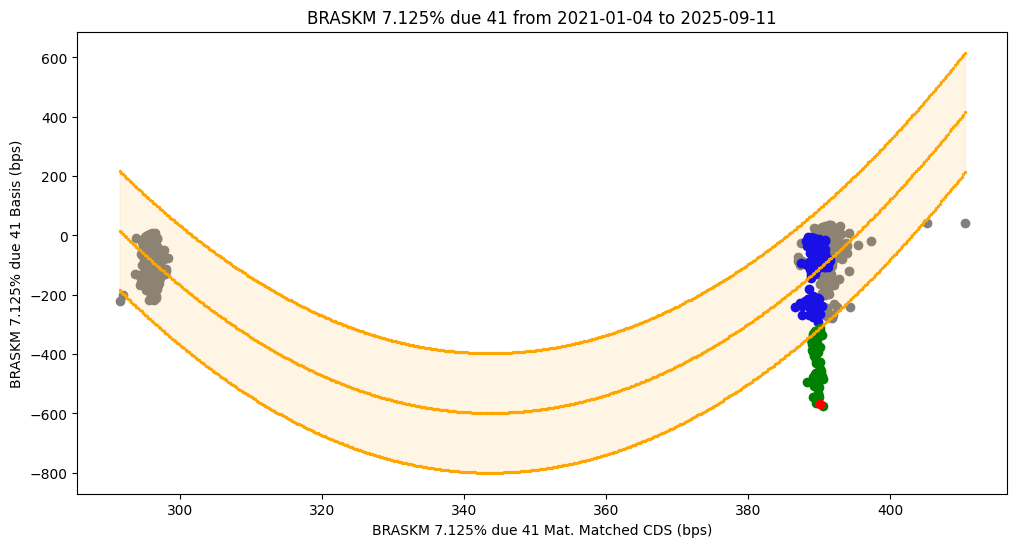

par scatter generated for BRASKM of fam EM


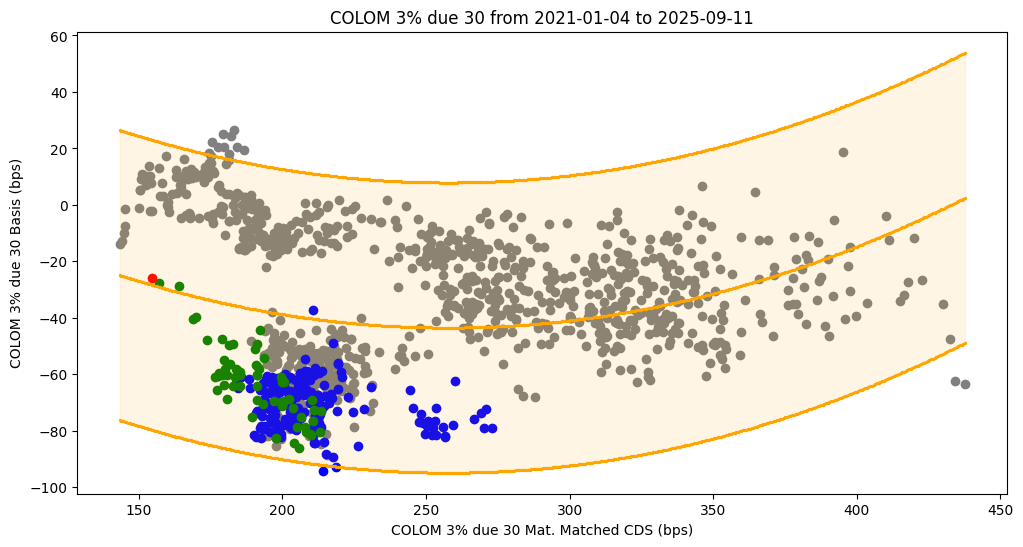

par scatter generated for COLOM of fam EM


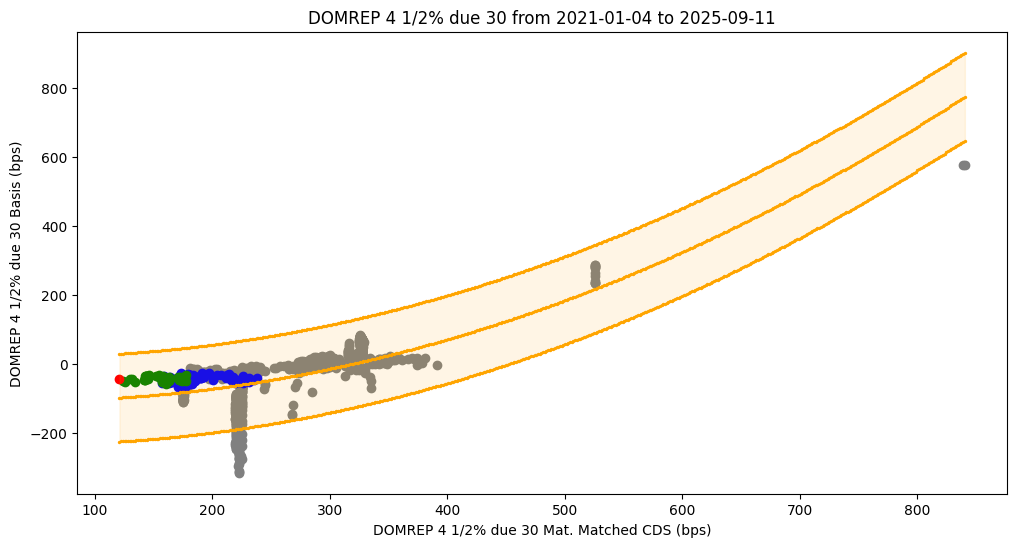

par scatter generated for DOMREP of fam EM


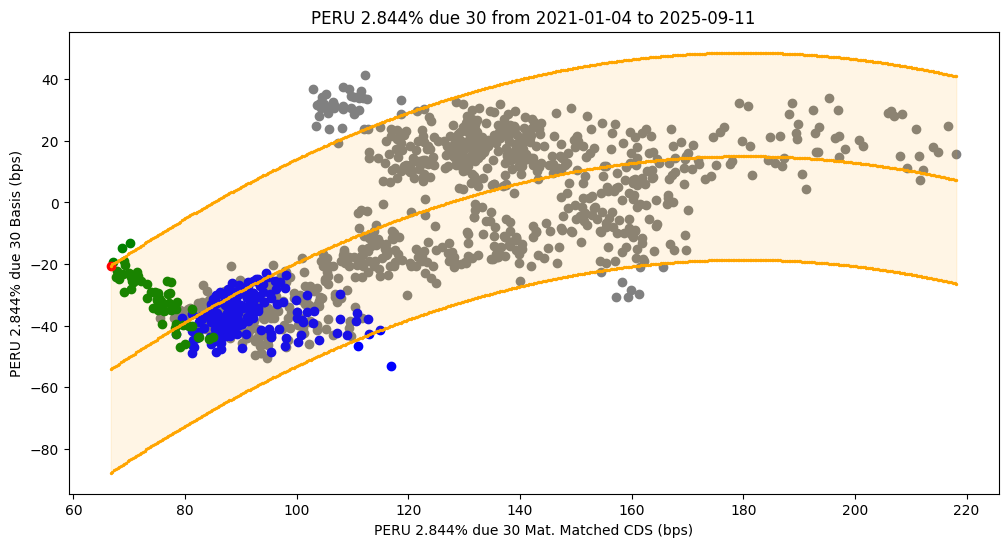

par scatter generated for PERU of fam EM


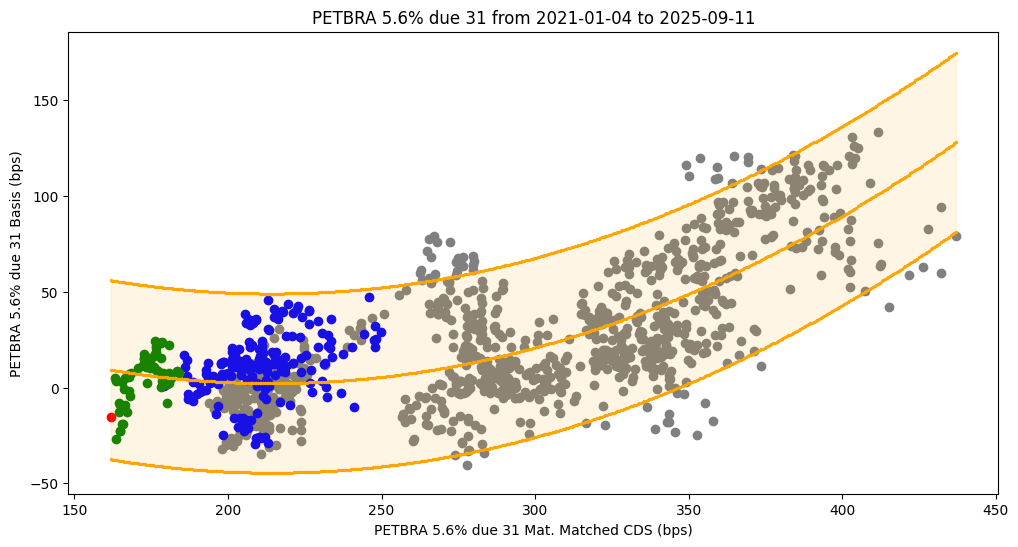

par scatter generated for PETBRA of fam EM


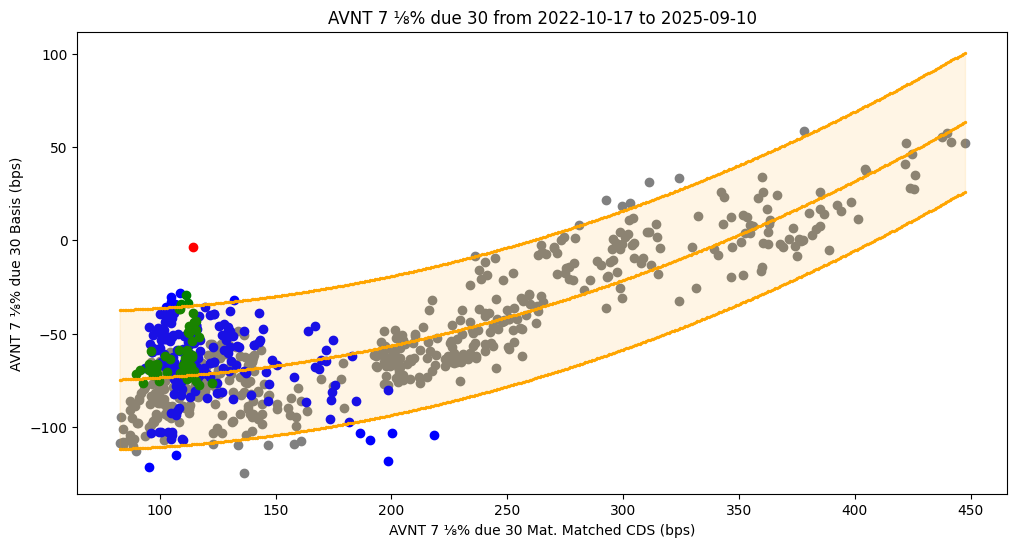

par scatter generated for AVNT of fam HY


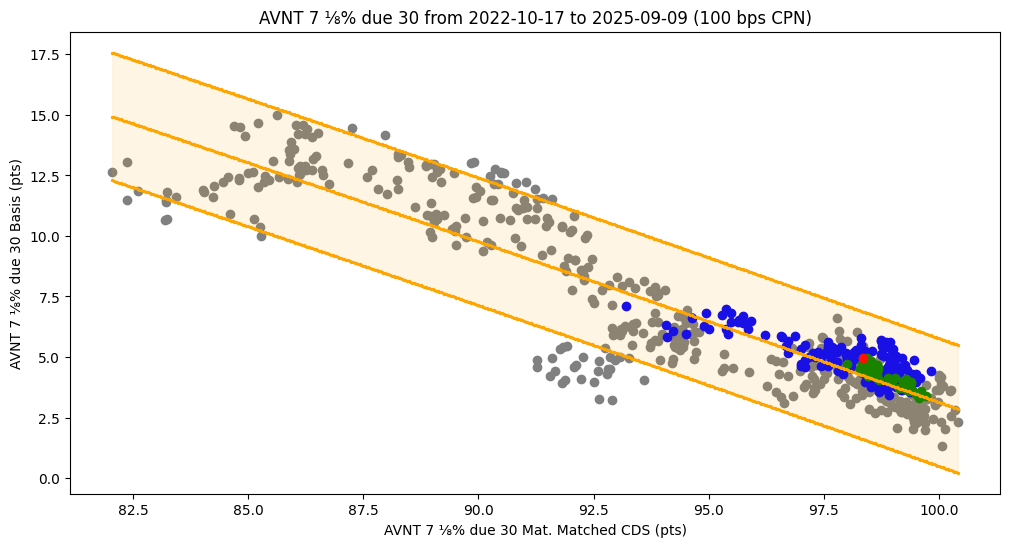

scatter generated for AVNT of fam HY for 100


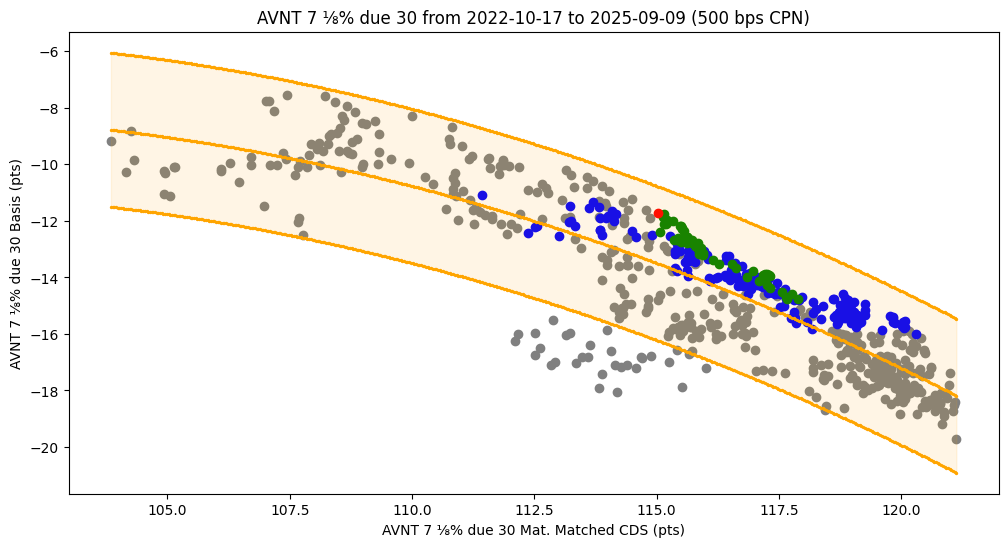

scatter generated for AVNT of fam HY for 500


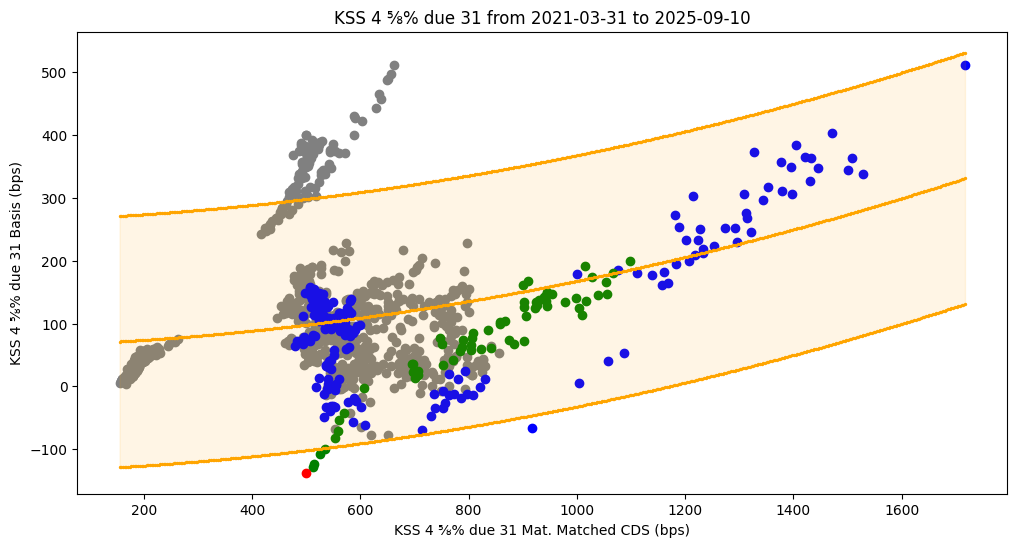

par scatter generated for KSS of fam HY


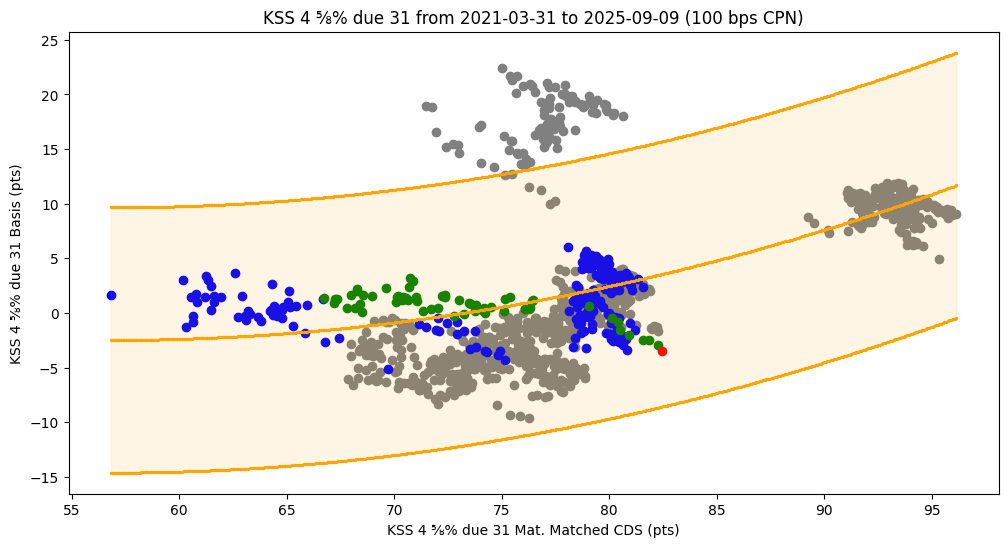

scatter generated for KSS of fam HY for 100


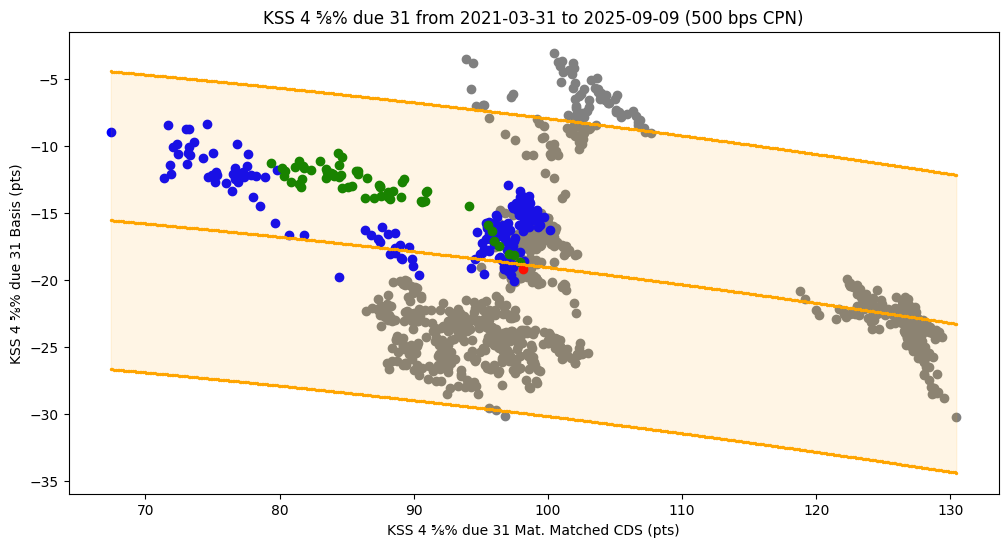

scatter generated for KSS of fam HY for 500


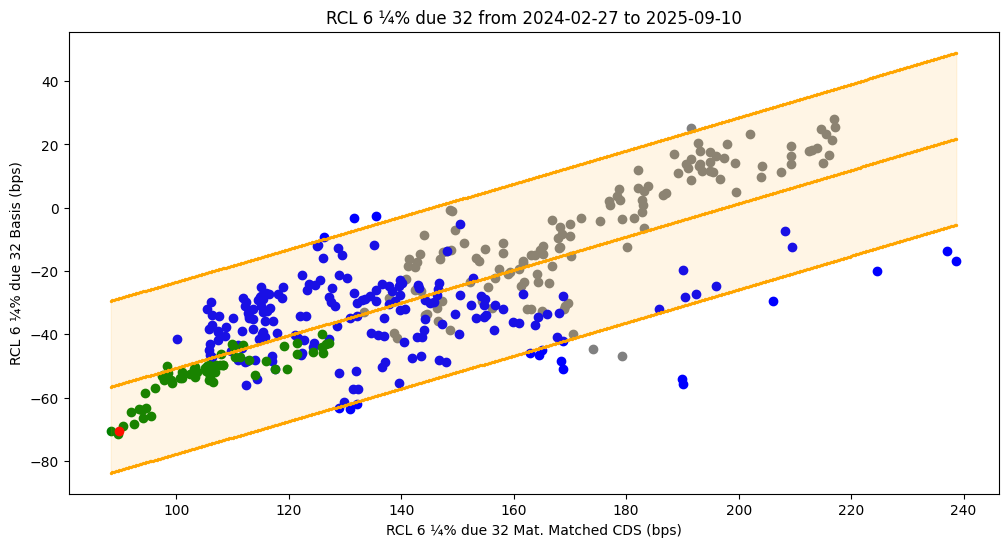

par scatter generated for RCL of fam HY


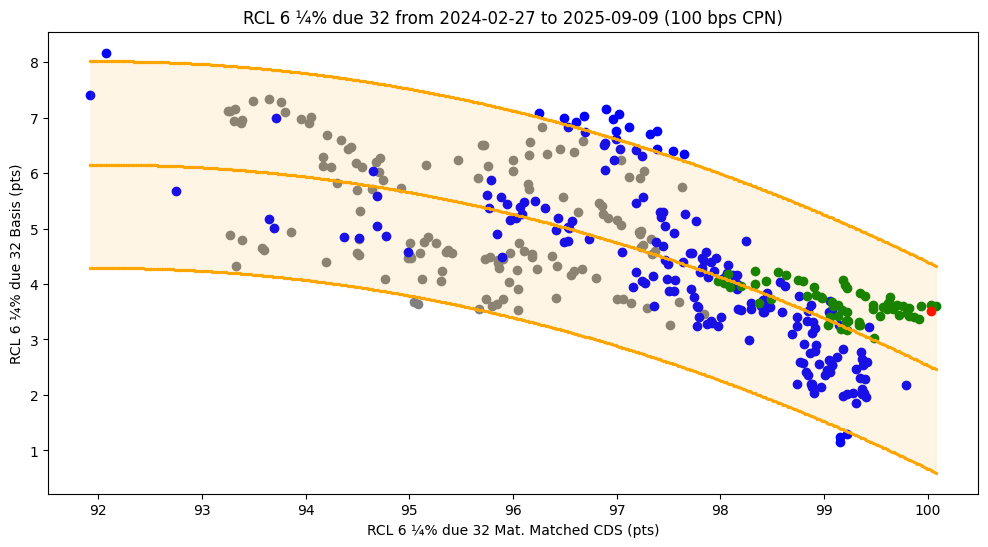

scatter generated for RCL of fam HY for 100


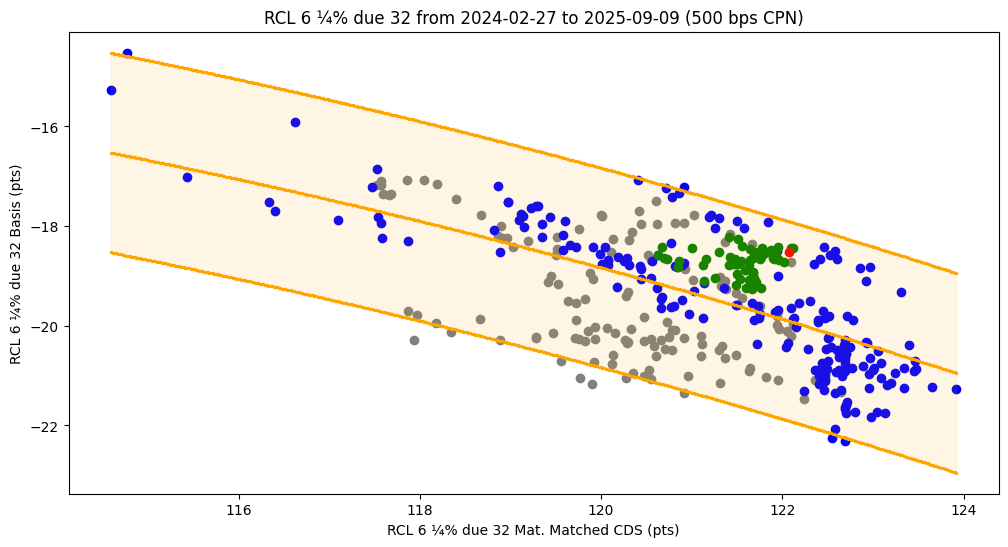

scatter generated for RCL of fam HY for 500


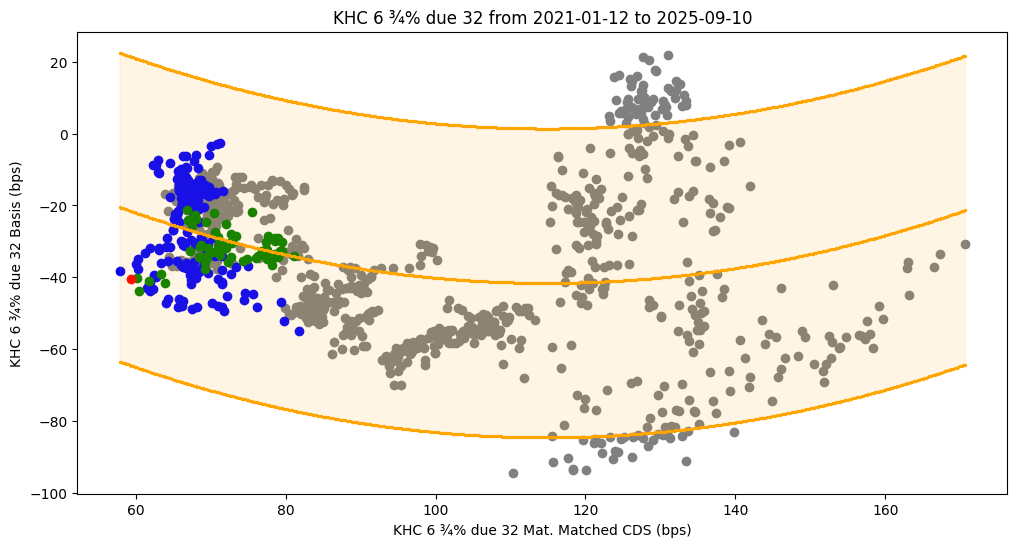

par scatter generated for KHC of fam IG


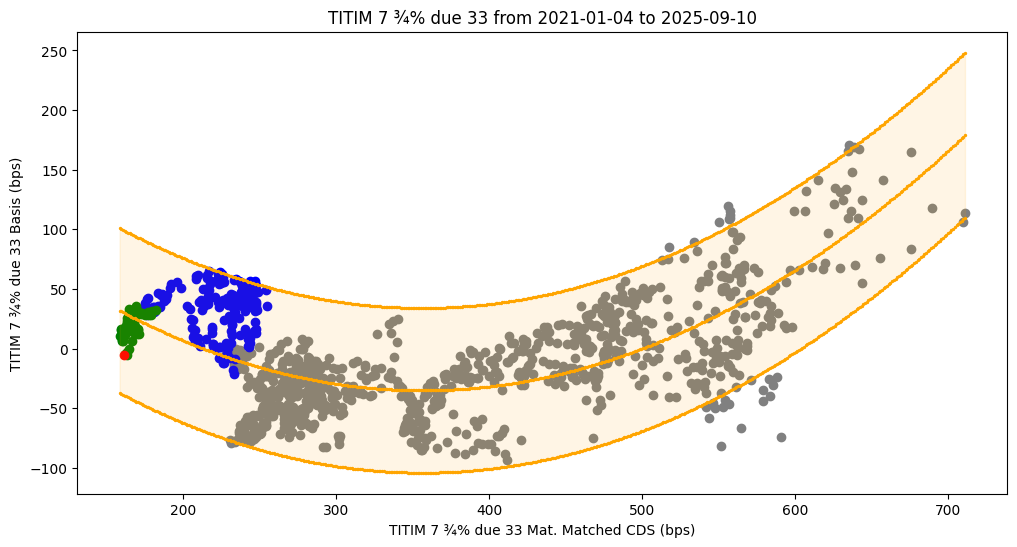

par scatter generated for TITIM of fam EUR_HY


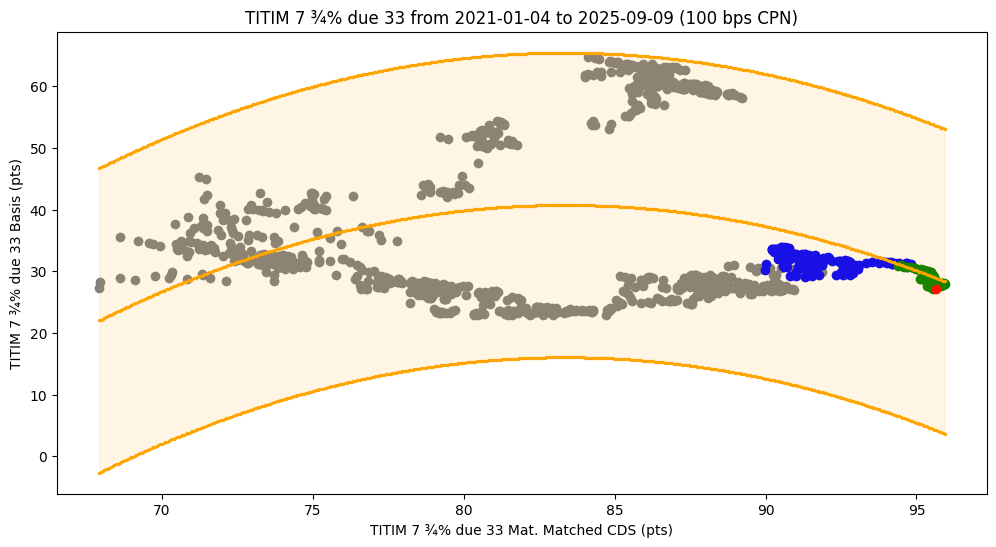

scatter generated for TITIM of fam EUR_HY for 100


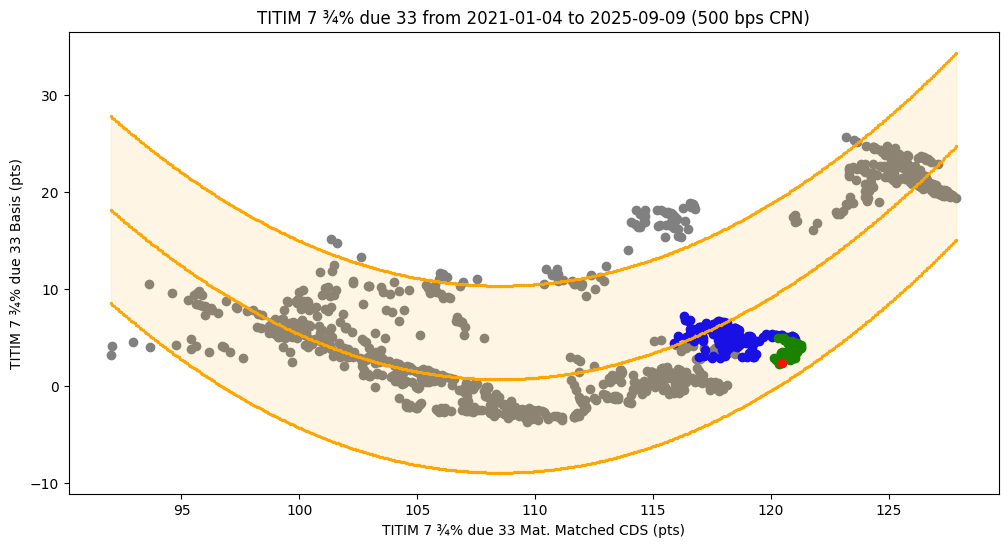

scatter generated for TITIM of fam EUR_HY for 500


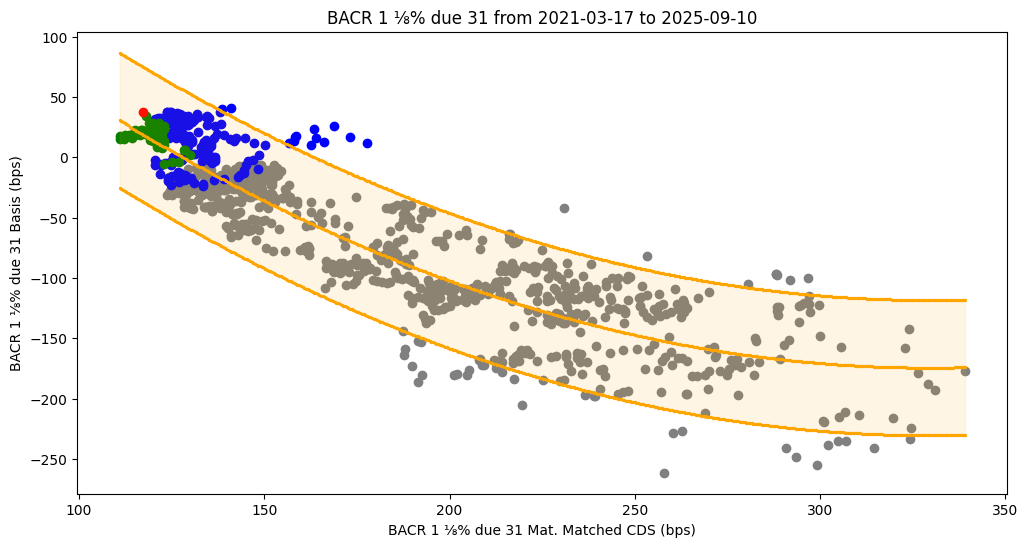

par scatter generated for BACR of fam SNRFIN


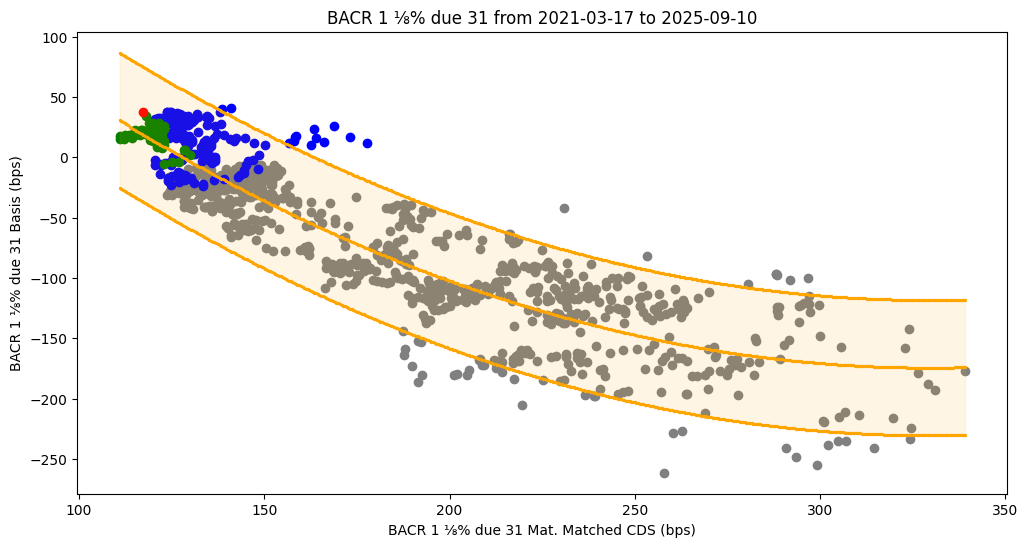

par scatter generated for BACR of fam SUBFIN


In [40]:
for fam in ["EM","HY","IG","EUR_HY", 'EUR_IG', 'SNRFIN', 'SUBFIN']:
    i=1
    x = plot_names[plot_names["Family"]==fam].copy()
    if len(x)>0:
        for item in x.index:
            gen_plots(item, all_bonds, fam, i)
            print(f"par scatter generated for {item} of fam {fam}")
            i += 1
            if fam == "HY" or fam == "EUR_HY":
                gen_plots(item, uf100_scatter, fam, i, True, "100")
                print(f"scatter generated for {item} of fam {fam} for 100")
                i += 1
                gen_plots(item, uf500_scatter, fam, i, True, "500")
                print(f"scatter generated for {item} of fam {fam} for 500")
                i += 1

In [44]:
import os
import win32com.client
import glob
import pandas as pd
import dataframe_image as dfi
from io import BytesIO
import tempfile

html_body = "<html><body>"

outlook = win32com.client.Dispatch("Outlook.Application")
mail = outlook.CreateItem(0)

folder_path = f'J:\\53A. HY Bonds Basis Email\\Email Plots'

for family in ["EM","HY","IG","EURHY", 'EURIG', 'SNRFIN', 'SUBFIN']:
    html_body += f'<h2 style="color:red;">{family}</h2>'
    png_files = glob.glob(os.path.join(folder_path, '*.png'))
    png_files = [item for item in png_files if item.rsplit("\\")[-1].split("_")[0]==family]
    png_files.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].rsplit("_")[-1]))
    for png_file in png_files:
        raw_name = os.path.splitext(os.path.basename(png_file))[0]
        image_cid = raw_name.replace(" ", "_")
        attachment = mail.Attachments.Add(Source=png_file)
        attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", image_cid)
        html_body += f'<img src="cid:{image_cid}"><br><br><br>'

folder_path = f'J:\\53A. HY Bonds Basis Email\\Email Plots\\Scatter Plots2'

for family in ["EM","HY","IG","EURHY", 'EURIG', 'SNRFIN', 'SUBFIN']:
    
    png_files = glob.glob(os.path.join(folder_path, '*.png'))
    png_files = [item for item in png_files if ((item.rsplit("\\")[-1].\
        split("_",1)[1].rsplit("_",1)[0]==family) and (item.rsplit("\\")[-1].split("_")[0]==str(datetime.now().date())))]
    png_files.sort(key=lambda x: int(os.path.splitext(os.path.basename(x))[0].rsplit("_")[-1]))
    if len(png_files) > 0:
        html_body += f'<h2 style="color:red;">{family} Basis Scatter Plots</h2>'
        for png_file in png_files:
            raw_name = os.path.splitext(os.path.basename(png_file))[0]
            image_cid = raw_name.replace(" ", "_")
            attachment = mail.Attachments.Add(Source=png_file)
            attachment.PropertyAccessor.SetProperty("http://schemas.microsoft.com/mapi/proptag/0x3712001F", image_cid)
            html_body += f'<img src="cid:{image_cid}"><br><br><br>'
    
html_body += '</body></html>'

mail.HTMLBody = html_body
mail.Subject = f'Median Basis ZScores (auto)'
mail.CC = 'vasu.sharma@iiicm.com'
if email_both:
    mail.To = 'spyros.michas@iiicm.com'
mail.Send()

print("Sent")

Sent
